In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [11]:
df = pd.read_csv('student_col_Change.csv')
df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,...,2,4,3,4,1,1,3,4,0,11
1,GP,F,U,GT3,T,at_home,other,course,father,no,...,2,5,3,3,1,1,3,2,9,11
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,...,2,4,3,2,2,3,3,6,12,13
3,GP,F,U,GT3,T,health,services,home,mother,no,...,3,3,2,2,1,1,5,0,14,14
4,GP,F,U,GT3,T,other,other,home,father,no,...,2,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,...,3,5,4,2,1,2,5,4,10,11
645,MS,F,U,LE3,T,teacher,services,course,mother,no,...,2,4,3,4,1,1,1,4,15,15
646,MS,F,U,GT3,T,other,other,course,mother,no,...,2,1,1,1,1,1,5,6,11,12
647,MS,M,U,LE3,T,services,services,course,mother,no,...,1,2,4,5,3,4,2,6,10,10


In [12]:
df = df[df['age'] == 16]
df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
4,GP,F,U,GT3,T,other,other,home,father,no,...,2,4,3,2,1,2,5,0,11,13
5,GP,M,U,LE3,T,services,other,reputation,mother,no,...,2,5,4,2,1,2,5,6,12,12
6,GP,M,U,LE3,T,other,other,home,mother,no,...,2,4,4,4,1,1,3,0,13,12
15,GP,F,U,GT3,T,health,other,home,mother,no,...,1,4,4,4,1,2,2,6,17,17
16,GP,F,U,GT3,T,services,services,reputation,mother,no,...,3,3,2,3,1,2,2,10,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,MS,F,R,LE3,T,other,services,course,father,no,...,2,5,4,3,1,1,1,0,11,13
564,MS,M,R,GT3,T,services,other,course,father,no,...,1,4,5,5,2,3,5,2,11,9
565,MS,M,R,LE3,T,at_home,other,course,mother,no,...,1,4,5,5,2,4,5,0,10,10
570,MS,M,R,GT3,T,services,services,course,mother,no,...,1,5,4,3,2,4,4,6,7,8


In [5]:
# 카이제곱 진행하는 함수
df_pvalue_list = []

def cal_chi2(s1, s2):
    contingency = pd.crosstab(s1, s2)
    chi2, p, dof, expected = chi2_contingency(contingency)
    return chi2, p

def do_chi2(df):
    col_list = []
    s_list = []
    p_list = []
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            return_chi2, return_p = cal_chi2(df[columns[i]], df[columns[j]])
            print(columns[i], columns[j])
            print(f"chi2 statistic: {return_chi2}")
            print(f"p-value: {return_p}")
            print("------------------------------------------------------------")

            if return_p < 0.05:
                col_list.append(columns[i]+ " - "+ columns[j])
                s_list.append(return_chi2)
                p_list.append(return_p)

    df_pvalue = pd.DataFrame({'col': col_list, 'statistic': s_list, 'p-value':p_list})
    df_pvalue_list.append(df_pvalue)

In [6]:
columns = df.columns

do_chi2(df)

school sex
chi2 statistic: 4.853671875
p-value: 0.027587345130584875
------------------------------------------------------------
school address
chi2 statistic: 37.21678369611495
p-value: 1.0570013137185998e-09
------------------------------------------------------------
school famsize
chi2 statistic: 2.2727976384192736
p-value: 0.13166203920649716
------------------------------------------------------------
school Pstatus
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school Mjob
chi2 statistic: 13.982631943608174
p-value: 0.007350694185323818
------------------------------------------------------------
school Fjob
chi2 statistic: 2.988734829286378
p-value: 0.5597123663011714
------------------------------------------------------------
school reason
chi2 statistic: 22.26170119975065
p-value: 5.75426003094509e-05
------------------------------------------------------------
school guardian
chi2 statistic: 3.2975750642021
p-value: 0.19228290

famsize famrel
chi2 statistic: 1.7031116361898972
p-value: 0.7901523139169518
------------------------------------------------------------
famsize freetime
chi2 statistic: 9.277462331548492
p-value: 0.054526301566165246
------------------------------------------------------------
famsize goout
chi2 statistic: 0.8353297992330251
p-value: 0.9336498364744583
------------------------------------------------------------
famsize Dalc
chi2 statistic: 12.258164039806346
p-value: 0.0155312750512698
------------------------------------------------------------
famsize Walc
chi2 statistic: 8.154312816765739
p-value: 0.08608629413470537
------------------------------------------------------------
famsize health
chi2 statistic: 1.3028848536079305
p-value: 0.8608858835950945
------------------------------------------------------------
famsize absences
chi2 statistic: 10.403231921980016
p-value: 0.6606748399210296
------------------------------------------------------------
famsize G1
chi2 statistic: 

reason famrel
chi2 statistic: 5.633633238622887
p-value: 0.9334133604119544
------------------------------------------------------------
reason freetime
chi2 statistic: 10.617927910248
p-value: 0.5619144651664496
------------------------------------------------------------
reason goout
chi2 statistic: 13.024876910360781
p-value: 0.3672351175251454
------------------------------------------------------------
reason Dalc
chi2 statistic: 6.312333961949347
p-value: 0.8995260944432485
------------------------------------------------------------
reason Walc
chi2 statistic: 5.863101532829293
p-value: 0.9228250156439041
------------------------------------------------------------
reason health
chi2 statistic: 13.63500736072165
p-value: 0.3246205505651348
------------------------------------------------------------
reason absences
chi2 statistic: 37.34169052871931
p-value: 0.545638886199513
------------------------------------------------------------
reason G1
chi2 statistic: 39.337788150049896

activities Fedu
chi2 statistic: 6.04150946979288
p-value: 0.1960696933009822
------------------------------------------------------------
activities traveltime
chi2 statistic: 11.085158810067805
p-value: 0.011274190378188704
------------------------------------------------------------
activities studytime
chi2 statistic: 0.8724975447608975
p-value: 0.832059193737279
------------------------------------------------------------
activities famrel
chi2 statistic: 3.6310450328950283
p-value: 0.4582343000799618
------------------------------------------------------------
activities freetime
chi2 statistic: 5.326490826113919
p-value: 0.25540725389992613
------------------------------------------------------------
activities goout
chi2 statistic: 2.3487060473923105
p-value: 0.6719160554310135
------------------------------------------------------------
activities Dalc
chi2 statistic: 3.657890832285993
p-value: 0.4542800511288523
------------------------------------------------------------
acti

age G1
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
age G2
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
Medu Fedu
chi2 statistic: 118.02553244706371
p-value: 1.3153218364486859e-17
------------------------------------------------------------
Medu traveltime
chi2 statistic: 30.462614455808406
p-value: 0.002377561311639185
------------------------------------------------------------
Medu studytime
chi2 statistic: 14.030546045813463
p-value: 0.2987619140743488
------------------------------------------------------------
Medu famrel
chi2 statistic: 6.513582506261329
p-value: 0.9815381429903167
------------------------------------------------------------
Medu freetime
chi2 statistic: 14.181131027234207
p-value: 0.5852219402000469
------------------------------------------------------------
Medu goout
chi2 statistic: 8.905072547102908
p-value: 0.9172711898554198
---------------------------------

health absences
chi2 statistic: 53.40656925219799
p-value: 0.4199634124037433
------------------------------------------------------------
health G1
chi2 statistic: 52.15170282416329
p-value: 0.31571005907722915
------------------------------------------------------------
health G2
chi2 statistic: 70.28785565115606
p-value: 0.046329510451250264
------------------------------------------------------------
absences G1
chi2 statistic: 142.32819359003287
p-value: 0.7763187076988005
------------------------------------------------------------
absences G2
chi2 statistic: 146.32317136105354
p-value: 0.8955685609505597
------------------------------------------------------------
G1 G2
chi2 statistic: 621.7149592524789
p-value: 7.66696502948826e-57
------------------------------------------------------------


In [6]:
df_pvalue_list[0].to_csv('age_16_pvalue.csv')

In [7]:
### 데이터 나눠보기
# 1. 남, 여 로만 나눠보기
df_M = df[df['sex'] == 'M']
df_F = df[df['sex'] == 'F']

In [8]:
do_chi2(df_M)
do_chi2(df_F)

school sex
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school address
chi2 statistic: 8.60377358490566
p-value: 0.0033546719191940516
------------------------------------------------------------
school famsize
chi2 statistic: 1.5104270109235352
p-value: 0.21907393985830395
------------------------------------------------------------
school Pstatus
chi2 statistic: 0.7864945382323737
p-value: 0.37516220935736055
------------------------------------------------------------
school Mjob
chi2 statistic: 5.383874376689377
p-value: 0.2501271514148459
------------------------------------------------------------
school Fjob
chi2 statistic: 11.512757479233482
p-value: 0.021367340180748835
------------------------------------------------------------
school reason
chi2 statistic: 10.901631437083275
p-value: 0.012269858948034274
------------------------------------------------------------
school guardian
chi2 statistic: 1.4906092137645175
p-value: 0.

famsize freetime
chi2 statistic: 16.68
p-value: 0.0022301336830312457
------------------------------------------------------------
famsize goout
chi2 statistic: 3.870546558704454
p-value: 0.42380886312933697
------------------------------------------------------------
famsize Dalc
chi2 statistic: 5.791202090592336
p-value: 0.21529349992154823
------------------------------------------------------------
famsize Walc
chi2 statistic: 6.672423228944968
p-value: 0.1542453831732229
------------------------------------------------------------
famsize health
chi2 statistic: 4.547635135135135
p-value: 0.336936493914678
------------------------------------------------------------
famsize absences
chi2 statistic: 4.802678571428571
p-value: 0.7784429345270063
------------------------------------------------------------
famsize G1
chi2 statistic: 12.596703296703296
p-value: 0.24710246886991694
------------------------------------------------------------
famsize G2
chi2 statistic: 6.181993006993007


reason goout
chi2 statistic: 13.21644013880856
p-value: 0.3535072083551385
------------------------------------------------------------
reason Dalc
chi2 statistic: 10.789188651070184
p-value: 0.5470665065091056
------------------------------------------------------------
reason Walc
chi2 statistic: 13.316087825218261
p-value: 0.34649081107825536
------------------------------------------------------------
reason health
chi2 statistic: 14.093696911196911
p-value: 0.2947650340439002
------------------------------------------------------------
reason absences
chi2 statistic: 22.028835034013603
p-value: 0.577545633125228
------------------------------------------------------------
reason G1
chi2 statistic: 37.37833594976451
p-value: 0.16637129598951644
------------------------------------------------------------
reason G2
chi2 statistic: 49.50637112887112
p-value: 0.03244139805022337
------------------------------------------------------------
guardian schoolsup
chi2 statistic: 15.25970149

nursery romantic
chi2 statistic: 0.017258500838954922
p-value: 0.8954813431510986
------------------------------------------------------------
nursery age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
nursery Medu
chi2 statistic: 9.464723878662173
p-value: 0.05047716174225789
------------------------------------------------------------
nursery Fedu
chi2 statistic: 3.1357867284844976
p-value: 0.5353644740646047
------------------------------------------------------------
nursery traveltime
chi2 statistic: 14.116256157635465
p-value: 0.002751104021341484
------------------------------------------------------------
nursery studytime
chi2 statistic: 1.004081632653061
p-value: 0.8002643226592704
------------------------------------------------------------
nursery famrel
chi2 statistic: 2.8937699217618085
p-value: 0.4082954120146771
------------------------------------------------------------
nursery freetime
chi2 statistic: 2.7097536945812815


traveltime goout
chi2 statistic: 11.29591093117409
p-value: 0.5037437380109131
------------------------------------------------------------
traveltime Dalc
chi2 statistic: 3.694076655052265
p-value: 0.9883457028486092
------------------------------------------------------------
traveltime Walc
chi2 statistic: 6.008531468531468
p-value: 0.9156513803309545
------------------------------------------------------------
traveltime health
chi2 statistic: 9.35662162162162
p-value: 0.6722060349619342
------------------------------------------------------------
traveltime absences
chi2 statistic: 30.15535714285715
p-value: 0.17965590179537963
------------------------------------------------------------
traveltime G1
chi2 statistic: 20.522087912087915
p-value: 0.9022350501246865
------------------------------------------------------------
traveltime G2
chi2 statistic: 36.92307692307693
p-value: 0.2924003467389091
------------------------------------------------------------
studytime famrel
chi2 s

sex internet
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex romantic
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex Medu
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex Fedu
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex traveltime
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex studytime
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex famrel
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex freetime
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex goout
chi2 statistic: 0.0
p-value: 1.0
------

Mjob nursery
chi2 statistic: 1.1596323529411767
p-value: 0.8846991102458363
------------------------------------------------------------
Mjob higher
chi2 statistic: 4.875
p-value: 0.3003654025467575
------------------------------------------------------------
Mjob internet
chi2 statistic: 11.480777777777778
p-value: 0.02166036325052332
------------------------------------------------------------
Mjob romantic
chi2 statistic: 6.218347423510466
p-value: 0.18342457217168417
------------------------------------------------------------
Mjob age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
Mjob Medu
chi2 statistic: 82.76847972774746
p-value: 5.254604501158829e-11
------------------------------------------------------------
Mjob Fedu
chi2 statistic: 38.47552507541479
p-value: 0.00012834949022232412
------------------------------------------------------------
Mjob traveltime
chi2 statistic: 15.256410256410257
p-value: 0.22771274599190935
-------

schoolsup Dalc
chi2 statistic: 7.349516685045549
p-value: 0.11853098538352473
------------------------------------------------------------
schoolsup Walc
chi2 statistic: 5.175407088122606
p-value: 0.26976846428553075
------------------------------------------------------------
schoolsup health
chi2 statistic: 1.6757372576338085
p-value: 0.7951201191186059
------------------------------------------------------------
schoolsup absences
chi2 statistic: 12.651783082817563
p-value: 0.39485017387060767
------------------------------------------------------------
schoolsup G1
chi2 statistic: 11.632759618173838
p-value: 0.4756053305152209
------------------------------------------------------------
schoolsup G2
chi2 statistic: 10.856481481481481
p-value: 0.5412567139939031
------------------------------------------------------------
famsup paid
chi2 statistic: 0.27795439665592253
p-value: 0.5980451227265855
------------------------------------------------------------
famsup activities
chi2 sta

internet G1
chi2 statistic: 16.767385542733837
p-value: 0.15855897900012006
------------------------------------------------------------
internet G2
chi2 statistic: 16.74308080808081
p-value: 0.1595199928197364
------------------------------------------------------------
romantic age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
romantic Medu
chi2 statistic: 2.5424374153356344
p-value: 0.63705317821131
------------------------------------------------------------
romantic Fedu
chi2 statistic: 1.9072077751745269
p-value: 0.5918876072012571
------------------------------------------------------------
romantic traveltime
chi2 statistic: 3.8152110570588826
p-value: 0.28212178042099845
------------------------------------------------------------
romantic studytime
chi2 statistic: 1.985695412832479
p-value: 0.5753809774966108
------------------------------------------------------------
romantic famrel
chi2 statistic: 3.4944561725320287
p-value: 

Walc absences
chi2 statistic: 37.7877938034188
p-value: 0.8548797696617964
------------------------------------------------------------
Walc G1
chi2 statistic: 34.02010786072803
p-value: 0.9363819304269427
------------------------------------------------------------
Walc G2
chi2 statistic: 46.752241161616155
p-value: 0.5240070827736296
------------------------------------------------------------
health absences
chi2 statistic: 57.24695674695674
p-value: 0.16947184400236298
------------------------------------------------------------
health G1
chi2 statistic: 44.21363176160706
p-value: 0.6287467860453169
------------------------------------------------------------
health G2
chi2 statistic: 49.73108738904193
p-value: 0.40419443893524565
------------------------------------------------------------
absences G1
chi2 statistic: 147.4507199349498
p-value: 0.4047958636810692
------------------------------------------------------------
absences G2
chi2 statistic: 133.94783226033223
p-value: 0.7

In [9]:
df_pvalue_list[1].to_csv('age_16_pvalue_M.csv')
df_pvalue_list[2].to_csv('age_16_pvalue_F.csv')

In [7]:
# 2. GP, MS로만 나눠보기
df_GP = df[df['school'] == 'GP']
df_MS = df[df['school'] == 'MS']

In [11]:
do_chi2(df_GP)
do_chi2(df_MS)

school sex
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school address
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school famsize
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school Pstatus
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school Mjob
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school Fjob
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school reason
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school guardian
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school schoolsup
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school famsup
chi2 statisti

address health
chi2 statistic: 4.538020982924939
p-value: 0.3380629513153329
------------------------------------------------------------
address absences
chi2 statistic: 19.832816495375905
p-value: 0.030874211952200015
------------------------------------------------------------
address G1
chi2 statistic: 4.860163405617953
p-value: 0.8463237648520092
------------------------------------------------------------
address G2
chi2 statistic: 6.22583706891399
p-value: 0.7171200612344488
------------------------------------------------------------
famsize Pstatus
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
famsize Mjob
chi2 statistic: 2.001623068289735
p-value: 0.7354603356479359
------------------------------------------------------------
famsize Fjob
chi2 statistic: 7.159912854030501
p-value: 0.1276750464433075
------------------------------------------------------------
famsize reason
chi2 statistic: 1.946853146853147
p-value: 0.5835104759

Mjob health
chi2 statistic: 23.09801387922118
p-value: 0.11113937748192804
------------------------------------------------------------
Mjob absences
chi2 statistic: 37.399993773842276
p-value: 0.5879228739174349
------------------------------------------------------------
Mjob G1
chi2 statistic: 70.83192060464786
p-value: 0.0004680642269142412
------------------------------------------------------------
Mjob G2
chi2 statistic: 58.947668707807466
p-value: 0.009276203413413692
------------------------------------------------------------
Fjob reason
chi2 statistic: 16.417964257964258
p-value: 0.17283356887757223
------------------------------------------------------------
Fjob guardian
chi2 statistic: 2.0098208103224064
p-value: 0.9807092906790837
------------------------------------------------------------
Fjob schoolsup
chi2 statistic: 6.040455919693856
p-value: 0.1961473037273743
------------------------------------------------------------
Fjob famsup
chi2 statistic: 6.359276662018589

schoolsup activities
chi2 statistic: 0.5085369057000262
p-value: 0.475772905222546
------------------------------------------------------------
schoolsup nursery
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
schoolsup higher
chi2 statistic: 0.03922598721653094
p-value: 0.8430016288309075
------------------------------------------------------------
schoolsup internet
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
schoolsup romantic
chi2 statistic: 4.009591838463951
p-value: 0.04524210205820738
------------------------------------------------------------
schoolsup age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
schoolsup Medu
chi2 statistic: 2.9482859175530565
p-value: 0.5665165967145969
------------------------------------------------------------
schoolsup Fedu
chi2 statistic: 4.8208381689232755
p-value: 0.30617945274344105
--------------------

activities health
chi2 statistic: 1.5564290882351501
p-value: 0.8166009405392989
------------------------------------------------------------
activities absences
chi2 statistic: 4.570217282868477
p-value: 0.9179805200098167
------------------------------------------------------------
activities G1
chi2 statistic: 8.405579605579605
p-value: 0.49384572265464355
------------------------------------------------------------
activities G2
chi2 statistic: 12.650070626541215
p-value: 0.1790898681719187
------------------------------------------------------------
nursery higher
chi2 statistic: 0.1063627730294397
p-value: 0.7443236847638475
------------------------------------------------------------
nursery internet
chi2 statistic: 0.33266654543250285
p-value: 0.564093132173216
------------------------------------------------------------
nursery romantic
chi2 statistic: 0.028592143287483787
p-value: 0.8657241871014678
------------------------------------------------------------
nursery age
chi2

Medu freetime
chi2 statistic: 13.111809809720139
p-value: 0.6645656747317961
------------------------------------------------------------
Medu goout
chi2 statistic: 12.578099630731211
p-value: 0.7033189416125176
------------------------------------------------------------
Medu Dalc
chi2 statistic: 16.766280841247372
p-value: 0.4008745919292403
------------------------------------------------------------
Medu Walc
chi2 statistic: 12.985499120179256
p-value: 0.6738177449509326
------------------------------------------------------------
Medu health
chi2 statistic: 12.267530666239196
p-value: 0.7253672639399393
------------------------------------------------------------
Medu absences
chi2 statistic: 20.656586549797833
p-value: 0.9951253069664469
------------------------------------------------------------
Medu G1
chi2 statistic: 52.98204209719361
p-value: 0.033757462095263605
------------------------------------------------------------
Medu G2
chi2 statistic: 62.50334327197072
p-value: 0

Dalc absences
chi2 statistic: 29.60674777073553
p-value: 0.8858919320793343
------------------------------------------------------------
Dalc G1
chi2 statistic: 42.52350006084945
p-value: 0.21061752284714616
------------------------------------------------------------
Dalc G2
chi2 statistic: 36.31715640843918
p-value: 0.4538735917034555
------------------------------------------------------------
Walc health
chi2 statistic: 11.734360907265442
p-value: 0.7620546504756582
------------------------------------------------------------
Walc absences
chi2 statistic: 35.4443322307548
p-value: 0.6753443175555919
------------------------------------------------------------
Walc G1
chi2 statistic: 42.77667074788287
p-value: 0.20301257769615355
------------------------------------------------------------
Walc G2
chi2 statistic: 44.04271447506741
p-value: 0.16788904919669975
------------------------------------------------------------
health absences
chi2 statistic: 50.024915127473506
p-value: 0.13

address paid
chi2 statistic: 0.7709682691722923
p-value: 0.3799176771023641
------------------------------------------------------------
address activities
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
address nursery
chi2 statistic: 0.035021551724137935
p-value: 0.8515505060925134
------------------------------------------------------------
address higher
chi2 statistic: 0.5034045771370438
p-value: 0.478007988202499
------------------------------------------------------------
address internet
chi2 statistic: 0.0764754785537705
p-value: 0.7821318044123657
------------------------------------------------------------
address romantic
chi2 statistic: 0.858755655624085
p-value: 0.3540871469079728
------------------------------------------------------------
address age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
address Medu
chi2 statistic: 3.437536282363868
p-value: 0.48743942497283155
-------

Mjob higher
chi2 statistic: 2.7140713276836155
p-value: 0.6067545660565907
------------------------------------------------------------
Mjob internet
chi2 statistic: 6.333742825427767
p-value: 0.1755720253821688
------------------------------------------------------------
Mjob romantic
chi2 statistic: 10.270244043586267
p-value: 0.03611337244572959
------------------------------------------------------------
Mjob age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
Mjob Medu
chi2 statistic: 34.708952621452624
p-value: 0.004355080294769237
------------------------------------------------------------
Mjob Fedu
chi2 statistic: 34.4162533068783
p-value: 0.0005797385294442103
------------------------------------------------------------
Mjob traveltime
chi2 statistic: 15.37473544973545
p-value: 0.22158006929000523
------------------------------------------------------------
Mjob studytime
chi2 statistic: 20.531870638754693
p-value: 0.0576702744608

guardian traveltime
chi2 statistic: 3.631455713598571
p-value: 0.7264058390846263
------------------------------------------------------------
guardian studytime
chi2 statistic: 21.983395026873286
p-value: 0.0012192911358511293
------------------------------------------------------------
guardian famrel
chi2 statistic: 24.63248329634884
p-value: 0.0017937653395637212
------------------------------------------------------------
guardian freetime
chi2 statistic: 10.888605442176871
p-value: 0.20809121281556195
------------------------------------------------------------
guardian goout
chi2 statistic: 14.35064935064935
p-value: 0.0730714096127348
------------------------------------------------------------
guardian Dalc
chi2 statistic: 3.668785115593626
p-value: 0.7213947960894302
------------------------------------------------------------
guardian Walc
chi2 statistic: 6.8449575116241785
p-value: 0.5534494124803121
------------------------------------------------------------
guardian heal

activities Walc
chi2 statistic: 4.523633156966491
p-value: 0.3397543897048212
------------------------------------------------------------
activities health
chi2 statistic: 5.387182382834556
p-value: 0.24982565509239152
------------------------------------------------------------
activities absences
chi2 statistic: 13.020090303961272
p-value: 0.11116023480622912
------------------------------------------------------------
activities G1
chi2 statistic: 19.43293650793651
p-value: 0.07860238882585263
------------------------------------------------------------
activities G2
chi2 statistic: 18.617321170892602
p-value: 0.1354549565031761
------------------------------------------------------------
nursery higher
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
nursery internet
chi2 statistic: 0.47910575048732945
p-value: 0.4888276543334653
------------------------------------------------------------
nursery romantic
chi2 statistic: 3.009717987804

Medu Dalc
chi2 statistic: 8.283376009333459
p-value: 0.7626119429253508
------------------------------------------------------------
Medu Walc
chi2 statistic: 14.096902356902358
p-value: 0.5914948773580068
------------------------------------------------------------
Medu health
chi2 statistic: 8.461465245338763
p-value: 0.933927017664657
------------------------------------------------------------
Medu absences
chi2 statistic: 29.359534515663547
p-value: 0.6008551519496101
------------------------------------------------------------
Medu G1
chi2 statistic: 49.054733044733055
p-value: 0.43059685455724145
------------------------------------------------------------
Medu G2
chi2 statistic: 73.56282940724499
p-value: 0.026146154996667687
------------------------------------------------------------
Fedu traveltime
chi2 statistic: 3.4878174603174603
p-value: 0.9417876252607834
------------------------------------------------------------
Fedu studytime
chi2 statistic: 7.225437083045779
p-valu

Walc absences
chi2 statistic: 29.935263929618767
p-value: 0.5714051847067853
------------------------------------------------------------
Walc G1
chi2 statistic: 44.028317901234566
p-value: 0.6362764544655675
------------------------------------------------------------
Walc G2
chi2 statistic: 65.51378216690718
p-value: 0.09865754538432807
------------------------------------------------------------
health absences
chi2 statistic: 29.56165717054089
p-value: 0.590528524072871
------------------------------------------------------------
health G1
chi2 statistic: 52.95120223978919
p-value: 0.2889431535398395
------------------------------------------------------------
health G2
chi2 statistic: 61.04188967598059
p-value: 0.18288338818381533
------------------------------------------------------------
absences G1
chi2 statistic: 100.31175057021832
p-value: 0.3614473812409412
------------------------------------------------------------
absences G2
chi2 statistic: 92.94304651034858
p-value: 0.

In [12]:
df_pvalue_list[3].to_csv('age_16_pvalue_GP.csv')
df_pvalue_list[4].to_csv('age_16_pvalue_MS.csv')

In [8]:
# 3. 학교, 성별 모두 나눠서 해보기
df_GP_M = df[(df['school'] == 'GP') & (df['sex'] == 'M')]
df_GP_F = df[(df['school'] == 'GP') & (df['sex'] == 'F')]
df_MS_M = df[(df['school'] == 'MS') & (df['sex'] == 'M')]
df_MS_F = df[(df['school'] == 'MS') & (df['sex'] == 'F')]

In [14]:
do_chi2(df_GP_M)
do_chi2(df_GP_F)
do_chi2(df_MS_M)
do_chi2(df_MS_F)

school sex
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school address
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school famsize
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school Pstatus
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school Mjob
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school Fjob
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school reason
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school guardian
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school schoolsup
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school famsup
chi2 statisti

famsize romantic
chi2 statistic: 0.10222109761583442
p-value: 0.7491803372494483
------------------------------------------------------------
famsize age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
famsize Medu
chi2 statistic: 3.624527665317139
p-value: 0.45919788525695715
------------------------------------------------------------
famsize Fedu
chi2 statistic: 3.653109268898742
p-value: 0.4549825974440931
------------------------------------------------------------
famsize traveltime
chi2 statistic: 0.6301875901875902
p-value: 0.889488159555964
------------------------------------------------------------
famsize studytime
chi2 statistic: 6.911570424035798
p-value: 0.07477037539932195
------------------------------------------------------------
famsize famrel
chi2 statistic: 0.7102636468540361
p-value: 0.870787221694088
------------------------------------------------------------
famsize freetime
chi2 statistic: 10.409171286802867
p-val

Fjob freetime
chi2 statistic: 35.372135217723454
p-value: 0.000408475167964534
------------------------------------------------------------
Fjob goout
chi2 statistic: 8.615283613445378
p-value: 0.7353914601177372
------------------------------------------------------------
Fjob Dalc
chi2 statistic: 21.658199643493763
p-value: 0.04153397358186208
------------------------------------------------------------
Fjob Walc
chi2 statistic: 16.31578937130408
p-value: 0.17719665203649268
------------------------------------------------------------
Fjob health
chi2 statistic: 9.864459886518711
p-value: 0.6278502557627477
------------------------------------------------------------
Fjob absences
chi2 statistic: 20.48418309631545
p-value: 0.4908050640406091
------------------------------------------------------------
Fjob G1
chi2 statistic: 26.403688849277085
p-value: 0.3330047219955032
------------------------------------------------------------
Fjob G2
chi2 statistic: 31.71205843448491
p-value: 0.

famsup romantic
chi2 statistic: 0.2761811344785482
p-value: 0.5992152313703654
------------------------------------------------------------
famsup age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
famsup Medu
chi2 statistic: 9.505205570291777
p-value: 0.0496403943504872
------------------------------------------------------------
famsup Fedu
chi2 statistic: 11.49353656600424
p-value: 0.021542993009970982
------------------------------------------------------------
famsup traveltime
chi2 statistic: 1.298298253470667
p-value: 0.7295372124948574
------------------------------------------------------------
famsup studytime
chi2 statistic: 4.1631949291885775
p-value: 0.2443727004345548
------------------------------------------------------------
famsup famrel
chi2 statistic: 3.944455336434347
p-value: 0.2675247525214738
------------------------------------------------------------
famsup freetime
chi2 statistic: 2.4520005058798158
p-value: 0.65

higher famrel
chi2 statistic: 0.3231601635079896
p-value: 0.9556154224565125
------------------------------------------------------------
higher freetime
chi2 statistic: 4.480909090909091
p-value: 0.34481717371207543
------------------------------------------------------------
higher goout
chi2 statistic: 1.3901984126984128
p-value: 0.8458967781948488
------------------------------------------------------------
higher Dalc
chi2 statistic: 4.197171717171717
p-value: 0.3799787207622275
------------------------------------------------------------
higher Walc
chi2 statistic: 5.351037037037038
p-value: 0.2531370335420675
------------------------------------------------------------
higher health
chi2 statistic: 3.3366056166056164
p-value: 0.503153397420402
------------------------------------------------------------
higher absences
chi2 statistic: 9.898941798941799
p-value: 0.1943730528916181
------------------------------------------------------------
higher G1
chi2 statistic: 10.8650000000

studytime health
chi2 statistic: 10.970403696618275
p-value: 0.5314567913784023
------------------------------------------------------------
studytime absences
chi2 statistic: 27.595471667334017
p-value: 0.15200146268031342
------------------------------------------------------------
studytime G1
chi2 statistic: 49.70172371488161
p-value: 0.0015449890479826808
------------------------------------------------------------
studytime G2
chi2 statistic: 33.2042735042735
p-value: 0.19041207621163422
------------------------------------------------------------
famrel freetime
chi2 statistic: 9.368814760119108
p-value: 0.6711475724717118
------------------------------------------------------------
famrel goout
chi2 statistic: 7.629529649094866
p-value: 0.8133702397576911
------------------------------------------------------------
famrel Dalc
chi2 statistic: 14.045957906827471
p-value: 0.2977831200116184
------------------------------------------------------------
famrel Walc
chi2 statistic: 9

sex Mjob
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex Fjob
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex reason
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex guardian
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex schoolsup
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex famsup
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex paid
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex activities
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex nursery
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex higher
chi2 statistic: 0.0
p-value: 1.0
-------

Pstatus internet
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
Pstatus romantic
chi2 statistic: 0.026784856099302458
p-value: 0.8699981817046486
------------------------------------------------------------
Pstatus age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
Pstatus Medu
chi2 statistic: 4.837010833745262
p-value: 0.18412852871450913
------------------------------------------------------------
Pstatus Fedu
chi2 statistic: 1.723297730997831
p-value: 0.6317666589659818
------------------------------------------------------------
Pstatus traveltime
chi2 statistic: 1.0996769162210338
p-value: 0.7771520778996894
------------------------------------------------------------
Pstatus studytime
chi2 statistic: 2.908767223105458
p-value: 0.40590641899949353
------------------------------------------------------------
Pstatus famrel
chi2 statistic: 5.8556961264898115
p-value: 0.21018727626482028
---

reason absences
chi2 statistic: 24.481432350718066
p-value: 0.6034983743751716
------------------------------------------------------------
reason G1
chi2 statistic: 28.402657818372106
p-value: 0.39044347749251507
------------------------------------------------------------
reason G2
chi2 statistic: 27.425337616528097
p-value: 0.2850207759776282
------------------------------------------------------------
guardian schoolsup
chi2 statistic: 6.126588201418134
p-value: 0.04673349654233991
------------------------------------------------------------
guardian famsup
chi2 statistic: 1.1495106814655691
p-value: 0.5628425566104283
------------------------------------------------------------
guardian paid
chi2 statistic: 0.20760028149190715
p-value: 0.9014054336372204
------------------------------------------------------------
guardian activities
chi2 statistic: 1.4725801226788713
p-value: 0.47888726635915535
------------------------------------------------------------
guardian nursery
chi2 st

famsup Walc
chi2 statistic: 2.9453163451615456
p-value: 0.5670178935972046
------------------------------------------------------------
famsup health
chi2 statistic: 7.754588174982912
p-value: 0.10099305653511782
------------------------------------------------------------
famsup absences
chi2 statistic: 15.86918859649123
p-value: 0.06966403406614295
------------------------------------------------------------
famsup G1
chi2 statistic: 8.139861059992638
p-value: 0.5201154551431537
------------------------------------------------------------
famsup G2
chi2 statistic: 6.843162071846283
p-value: 0.5536451491931205
------------------------------------------------------------
paid activities
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
paid nursery
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
paid higher
chi2 statistic: 0.0
p-value: 1.0
----------------------------------------------------------

higher studytime
chi2 statistic: 3.9841954022988504
p-value: 0.2631758060372785
------------------------------------------------------------
higher famrel
chi2 statistic: 2.5131845841784988
p-value: 0.6422764554007674
------------------------------------------------------------
higher freetime
chi2 statistic: 0.9187986651835371
p-value: 0.9218484890027873
------------------------------------------------------------
higher goout
chi2 statistic: 4.438871473354232
p-value: 0.34985740229446105
------------------------------------------------------------
higher Dalc
chi2 statistic: 0.18310344827586209
p-value: 0.9802697547425517
------------------------------------------------------------
higher Walc
chi2 statistic: 2.5131845841784988
p-value: 0.6422764554007674
------------------------------------------------------------
higher health
chi2 statistic: 1.84072249589491
p-value: 0.7650241097546133
------------------------------------------------------------
higher absences
chi2 statistic: 4.9

studytime absences
chi2 statistic: 51.677384782741925
p-value: 0.0028966542072907794
------------------------------------------------------------
studytime G1
chi2 statistic: 39.80144823001966
p-value: 0.053469347572364656
------------------------------------------------------------
studytime G2
chi2 statistic: 28.994020551163405
p-value: 0.22035598185278335
------------------------------------------------------------
famrel freetime
chi2 statistic: 13.525961589143513
p-value: 0.6339823601618915
------------------------------------------------------------
famrel goout
chi2 statistic: 29.32822341057635
p-value: 0.021814587732758076
------------------------------------------------------------
famrel Dalc
chi2 statistic: 14.5435
p-value: 0.26735474885143057
------------------------------------------------------------
famrel Walc
chi2 statistic: 13.622118804158163
p-value: 0.6268422715987119
------------------------------------------------------------
famrel health
chi2 statistic: 21.78855

address Dalc
chi2 statistic: 2.064197530864198
p-value: 0.5591897335453604
------------------------------------------------------------
address Walc
chi2 statistic: 5.62962962962963
p-value: 0.22856773196590813
------------------------------------------------------------
address health
chi2 statistic: 6.055050505050505
p-value: 0.10896240058561531
------------------------------------------------------------
address absences
chi2 statistic: 4.693703703703704
p-value: 0.45439189808426306
------------------------------------------------------------
address G1
chi2 statistic: 4.770105820105821
p-value: 0.6879945876113526
------------------------------------------------------------
address G2
chi2 statistic: 9.774444444444445
p-value: 0.2017198943897201
------------------------------------------------------------
famsize Pstatus
chi2 statistic: 0.00989583333333334
p-value: 0.9207589109365504
------------------------------------------------------------
famsize Mjob
chi2 statistic: 2.59901234

Mjob Medu
chi2 statistic: 11.878518518518522
p-value: 0.4554847172941824
------------------------------------------------------------
Mjob Fedu
chi2 statistic: 16.496825396825397
p-value: 0.16952506505884357
------------------------------------------------------------
Mjob traveltime
chi2 statistic: 12.654603174603174
p-value: 0.3946372145132228
------------------------------------------------------------
Mjob studytime
chi2 statistic: 6.931481481481483
p-value: 0.5440430810684491
------------------------------------------------------------
Mjob famrel
chi2 statistic: 10.064242424242426
p-value: 0.6103246234455244
------------------------------------------------------------
Mjob freetime
chi2 statistic: 16.245502645502643
p-value: 0.43596177901206234
------------------------------------------------------------
Mjob goout
chi2 statistic: 11.73777777777778
p-value: 0.7618249501552152
------------------------------------------------------------
Mjob Dalc
chi2 statistic: 13.194444444444446

schoolsup freetime
chi2 statistic: 1.8095238095238093
p-value: 0.7707394591752167
------------------------------------------------------------
schoolsup goout
chi2 statistic: 2.9555555555555557
p-value: 0.565290411831837
------------------------------------------------------------
schoolsup Dalc
chi2 statistic: 1.4513888888888888
p-value: 0.6935343175722655
------------------------------------------------------------
schoolsup Walc
chi2 statistic: 2.955555555555556
p-value: 0.5652904118318369
------------------------------------------------------------
schoolsup health
chi2 statistic: 0.7676767676767675
p-value: 0.8571816570128421
------------------------------------------------------------
schoolsup absences
chi2 statistic: 0.95
p-value: 0.9664969682219853
------------------------------------------------------------
schoolsup G1
chi2 statistic: 1.8095238095238095
p-value: 0.9696268952287276
------------------------------------------------------------
schoolsup G2
chi2 statistic: 2.955

nursery Medu
chi2 statistic: 5.211805555555556
p-value: 0.15692866225756277
------------------------------------------------------------
nursery Fedu
chi2 statistic: 0.46651785714285726
p-value: 0.9261832539752394
------------------------------------------------------------
nursery traveltime
chi2 statistic: 6.966666666666667
p-value: 0.07296784231599933
------------------------------------------------------------
nursery studytime
chi2 statistic: 4.8984375
p-value: 0.08636102970539516
------------------------------------------------------------
nursery famrel
chi2 statistic: 2.9327651515151514
p-value: 0.40210805647663594
------------------------------------------------------------
nursery freetime
chi2 statistic: 1.89905753968254
p-value: 0.7543181254143979
------------------------------------------------------------
nursery goout
chi2 statistic: 3.9583333333333335
p-value: 0.41167418840964787
------------------------------------------------------------
nursery Dalc
chi2 statistic: 1

traveltime absences
chi2 statistic: 12.892857142857142
p-value: 0.6105733776361668
------------------------------------------------------------
traveltime G1
chi2 statistic: 13.985034013605441
p-value: 0.8702412597939924
------------------------------------------------------------
traveltime G2
chi2 statistic: 25.27
p-value: 0.23565963684395008
------------------------------------------------------------
studytime famrel
chi2 statistic: 3.1786616161616172
p-value: 0.7861119880646202
------------------------------------------------------------
studytime freetime
chi2 statistic: 8.837136243386245
p-value: 0.35622081788279536
------------------------------------------------------------
studytime goout
chi2 statistic: 11.400000000000002
p-value: 0.18004807424925776
------------------------------------------------------------
studytime Dalc
chi2 statistic: 10.43827160493827
p-value: 0.10736780351623
------------------------------------------------------------
studytime Walc
chi2 statistic: 

school absences
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school G1
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
school G2
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex address
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex famsize
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex Pstatus
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex Mjob
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex Fjob
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex reason
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
sex guardian
chi2 statistic: 0.0
p-value: 1.0
-------

famsize absences
chi2 statistic: 4.402307561017238
p-value: 0.8191254962671801
------------------------------------------------------------
famsize G1
chi2 statistic: 14.95522102747909
p-value: 0.2438944344634872
------------------------------------------------------------
famsize G2
chi2 statistic: 10.094091141833077
p-value: 0.6077062983757011
------------------------------------------------------------
Pstatus Mjob
chi2 statistic: 3.852991452991452
p-value: 0.4262667235471257
------------------------------------------------------------
Pstatus Fjob
chi2 statistic: 5.9651360544217695
p-value: 0.20176710686800736
------------------------------------------------------------
Pstatus reason
chi2 statistic: 2.5049058084772367
p-value: 0.47440514627670805
------------------------------------------------------------
Pstatus guardian
chi2 statistic: 2.119815668202765
p-value: 0.3464877432126866
------------------------------------------------------------
Pstatus schoolsup
chi2 statistic: 0.0

reason guardian
chi2 statistic: 1.4503848685876335
p-value: 0.9627219337845108
------------------------------------------------------------
reason schoolsup
chi2 statistic: 0.7555671841386126
p-value: 0.8600625204629235
------------------------------------------------------------
reason famsup
chi2 statistic: 13.096248480863867
p-value: 0.00443301890318152
------------------------------------------------------------
reason paid
chi2 statistic: 1.6083916083916083
p-value: 0.6574885791672305
------------------------------------------------------------
reason activities
chi2 statistic: 5.219613719613719
p-value: 0.15640441169998903
------------------------------------------------------------
reason nursery
chi2 statistic: 2.763525980192647
p-value: 0.42953943829746033
------------------------------------------------------------
reason higher
chi2 statistic: 5.51223036223036
p-value: 0.1379089335556562
------------------------------------------------------------
reason internet
chi2 statis

paid age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
paid Medu
chi2 statistic: 2.971291866028708
p-value: 0.5626410760739362
------------------------------------------------------------
paid Fedu
chi2 statistic: 2.489177489177489
p-value: 0.4772501288777701
------------------------------------------------------------
paid traveltime
chi2 statistic: 2.489177489177489
p-value: 0.4772501288777701
------------------------------------------------------------
paid studytime
chi2 statistic: 4.779220779220779
p-value: 0.18869614611138508
------------------------------------------------------------
paid famrel
chi2 statistic: 2.090909090909091
p-value: 0.719042718654129
------------------------------------------------------------
paid freetime
chi2 statistic: 2.4304584304584305
p-value: 0.6571300506360656
------------------------------------------------------------
paid goout
chi2 statistic: 2.947186147186147
p-value: 0.5667022223118163
--------

romantic age
chi2 statistic: 0.0
p-value: 1.0
------------------------------------------------------------
romantic Medu
chi2 statistic: 2.697294894155467
p-value: 0.6096880542750838
------------------------------------------------------------
romantic Fedu
chi2 statistic: 1.865107212475634
p-value: 0.6008703778053579
------------------------------------------------------------
romantic traveltime
chi2 statistic: 6.328682818156501
p-value: 0.09666928630640317
------------------------------------------------------------
romantic studytime
chi2 statistic: 2.0561673544129686
p-value: 0.5608311735040512
------------------------------------------------------------
romantic famrel
chi2 statistic: 1.8182802685726658
p-value: 0.7691362207341498
------------------------------------------------------------
romantic freetime
chi2 statistic: 3.81716007240603
p-value: 0.43131567422270656
------------------------------------------------------------
romantic goout
chi2 statistic: 0.18127811110267242


goout absences
chi2 statistic: 31.75517212945784
p-value: 0.4789352865940354
------------------------------------------------------------
goout G1
chi2 statistic: 51.32816738816739
p-value: 0.3446309292090124
------------------------------------------------------------
goout G2
chi2 statistic: 53.279777365491654
p-value: 0.27833551972658566
------------------------------------------------------------
Dalc Walc
chi2 statistic: 10.7388124695817
p-value: 0.09679202828945221
------------------------------------------------------------
Dalc health
chi2 statistic: 7.603479853479854
p-value: 0.4731289400648039
------------------------------------------------------------
Dalc absences
chi2 statistic: 9.169108669108667
p-value: 0.9062861661140359
------------------------------------------------------------
Dalc G1
chi2 statistic: 17.938034188034187
p-value: 0.8060039564531531
------------------------------------------------------------
Dalc G2
chi2 statistic: 31.340659340659343
p-value: 0.14420

In [15]:
df_pvalue_list[5].to_csv('age_16_pvalue_GP_M.csv')
df_pvalue_list[6].to_csv('age_16_pvalue_GP_F.csv')
df_pvalue_list[7].to_csv('age_16_pvalue_MS_M.csv')
df_pvalue_list[7].to_csv('age_16_pvalue_MS_F.csv')

In [9]:
len(df_MS_M)

19

In [17]:
### 각각 데이터 개수
'''
16세 전체: 177
M: 72
F: 105
GP: 112
MS: 65
GP_M: 53
GP_F: 59
MS_M: 19
MS_F: 46

'''

'\n16세 전체: 177\nM: 72\nF: 105\nGP: 112\nMS: 65\nGP_M: 53\nGP_F: 59\nMS_M: 19\nMS_F: 46\n\n'

In [18]:
df.corr()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_23800\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,0.646053,-0.289357,0.074951,0.032196,-0.066930,0.000275,-0.006258,0.058227,0.016242,0.195920,0.236667,0.265466
Fedu,NaN,0.646053,1.000000,-0.219139,0.049610,0.043826,0.037902,0.068018,-0.037965,0.118722,0.065234,0.228019,0.191031,0.231338
traveltime,NaN,-0.289357,-0.219139,1.000000,0.009977,0.077370,0.009168,-0.041465,0.035949,-0.073187,-0.126226,-0.019660,-0.118861,-0.139758
studytime,NaN,0.074951,0.049610,0.009977,1.000000,-0.025799,-0.119305,-0.118309,-0.230948,-0.311501,-0.056773,-0.193543,0.161088,0.141156
famrel,NaN,0.032196,0.043826,0.077370,-0.025799,1.000000,0.077441,0.162969,-0.006561,-0.041534,0.149396,-0.230957,0.156442,0.147234
freetime,NaN,-0.066930,0.037902,0.009168,-0.119305,0.077441,1.000000,0.369238,0.187088,0.110696,0.120815,-0.017293,-0.018815,-0.024479
goout,NaN,0.000275,0.068018,-0.041465,-0.118309,0.162969,0.369238,1.000000,0.266168,0.314135,0.035049,0.022405,-0.034607,-0.081634
Dalc,NaN,-0.006258,-0.037965,0.035949,-0.230948,-0.006561,0.187088,0.266168,1.000000,0.586151,0.118228,0.080479,-0.206286,-0.255533
Walc,NaN,0.058227,0.118722,-0.073187,-0.311501,-0.041534,0.110696,0.314135,0.586151,1.000000,0.184278,0.101770,-0.237555,-0.277743


In [19]:
## 16세 데이터에서 상관 계수가 높은 것들
'''
Medu - Fedu 0.65
Dalc - Walc 0.59
G1 - G2 0.89

'''

'\nMedu - Fedu 0.65\nDalc - Walc 0.59\nG1 - G2 0.89\n\n'

In [20]:
df_M.corr()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_23800\104028875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_M.corr()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000e+00,0.687313,-0.330688,0.097765,0.025587,-0.076103,-0.024902,0.012637,-1.469974e-16,-0.001633,0.356254,0.339748,0.347604
Fedu,NaN,6.873127e-01,1.000000,-0.298075,0.081754,0.022605,0.031596,0.187679,0.059893,1.240362e-01,0.019350,0.302157,0.193023,0.234683
traveltime,NaN,-3.306878e-01,-0.298075,1.000000,-0.013705,-0.167958,-0.117240,-0.051524,-0.076430,-1.384991e-01,-0.276558,0.074819,-0.227471,-0.233458
studytime,NaN,9.776510e-02,0.081754,-0.013705,1.000000,0.169591,-0.122074,-0.156508,-0.217355,-3.273716e-01,-0.076241,-0.338260,0.281315,0.195468
famrel,NaN,2.558656e-02,0.022605,-0.167958,0.169591,1.000000,-0.045569,-0.072634,-0.095773,-5.127617e-02,0.040998,-0.238112,0.080194,0.041023
freetime,NaN,-7.610349e-02,0.031596,-0.117240,-0.122074,-0.045569,1.000000,0.458519,0.206592,1.452087e-01,0.286558,0.139502,-0.054737,-0.087556
goout,NaN,-2.490205e-02,0.187679,-0.051524,-0.156508,-0.072634,0.458519,1.000000,0.465133,5.218745e-01,0.141338,0.165174,-0.152596,-0.197648
Dalc,NaN,1.263724e-02,0.059893,-0.076430,-0.217355,-0.095773,0.206592,0.465133,1.000000,6.589465e-01,0.090069,0.219482,-0.377099,-0.426629
Walc,NaN,-1.469974e-16,0.124036,-0.138499,-0.327372,-0.051276,0.145209,0.521874,0.658947,1.000000e+00,0.136765,0.158186,-0.373450,-0.388870


In [21]:
## 16세 남자 데이터에서 상관 계수가 높은 것들
'''
Medu - Fedu
freetime - goout 0.46
goout - Dalc 0.47
goout - Walc 0.52
Dalc - Walc 0.66
Dalc - G2 -0.43
G1 - G2 0.86

'''

'\nMedu - Fedu\nfreetime - goout 0.46\ngoout - Dalc 0.47\ngoout - Walc 0.52\nDalc - Walc 0.66\nDalc - G2 -0.43\nG1 - G2 0.86\n\n'

In [22]:
df_F.corr()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_23800\174446019.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_F.corr()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,0.605814,-0.271267,0.112818,0.010254,-0.076754,0.028281,-0.123703,0.038364,-0.027271,0.074278,0.212709,0.256883
Fedu,NaN,0.605814,1.000000,-0.169110,0.060300,0.040193,0.033376,-0.019094,-0.225404,0.070303,0.062469,0.167819,0.216005,0.262886
traveltime,NaN,-0.271267,-0.169110,1.000000,0.029494,0.189444,0.094548,-0.034341,0.147366,-0.032954,-0.059073,-0.078520,-0.060509,-0.080289
studytime,NaN,0.112818,0.060300,0.029494,1.000000,-0.088369,-0.100898,-0.108230,-0.163538,-0.227712,0.024280,-0.087355,0.060063,0.057106
famrel,NaN,0.010254,0.040193,0.189444,-0.088369,1.000000,0.136545,0.295778,-0.004955,-0.103028,0.161351,-0.242610,0.213895,0.237130
freetime,NaN,-0.076754,0.033376,0.094548,-0.100898,0.136545,1.000000,0.306763,0.150391,0.051465,0.003920,-0.136373,0.015557,0.039071
goout,NaN,0.028281,-0.019094,-0.034341,-0.108230,0.295778,0.306763,1.000000,0.104648,0.169297,-0.010465,-0.071701,0.026944,-0.011804
Dalc,NaN,-0.123703,-0.225404,0.147366,-0.163538,-0.004955,0.150391,0.104648,1.000000,0.394244,0.033178,-0.087075,-0.015601,-0.009843
Walc,NaN,0.038364,0.070303,-0.032954,-0.227712,-0.103028,0.051465,0.169297,0.394244,1.000000,0.128960,0.033459,-0.098083,-0.118362


In [23]:
## 16세 여자 데이터에서 상관 계수가 높은 것들
'''
Medu - Fedu 0.61
G1 - G2 0.91


'''

'\nMedu - Fedu 0.61\nG1 - G2 0.91\n\n\n'

In [24]:
df_GP.corr()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_23800\1243632335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_GP.corr()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,0.624880,-0.283198,0.205877,-0.003180,0.084483,-0.007117,0.022528,0.021863,-0.010257,0.135595,0.309016,0.349117
Fedu,NaN,0.624880,1.000000,-0.252774,0.075504,-0.021418,0.103806,0.090122,0.047095,0.123342,-0.022933,0.214167,0.185270,0.164418
traveltime,NaN,-0.283198,-0.252774,1.000000,-0.144811,0.075030,-0.037573,-0.089790,0.075941,-0.014209,-0.125799,0.028024,-0.087553,-0.111220
studytime,NaN,0.205877,0.075504,-0.144811,1.000000,0.117161,-0.155417,0.008417,-0.233586,-0.247816,-0.031868,-0.245195,0.268263,0.258646
famrel,NaN,-0.003180,-0.021418,0.075030,0.117161,1.000000,0.071453,0.178844,-0.053978,-0.131158,0.189737,-0.259065,0.095225,0.079802
freetime,NaN,0.084483,0.103806,-0.037573,-0.155417,0.071453,1.000000,0.279034,0.285929,0.190359,0.147632,-0.072350,-0.043379,-0.065115
goout,NaN,-0.007117,0.090122,-0.089790,0.008417,0.178844,0.279034,1.000000,0.341216,0.301992,-0.019370,-0.053671,-0.016720,-0.064396
Dalc,NaN,0.022528,0.047095,0.075941,-0.233586,-0.053978,0.285929,0.341216,1.000000,0.648899,0.129848,0.105535,-0.351112,-0.371232
Walc,NaN,0.021863,0.123342,-0.014209,-0.247816,-0.131158,0.190359,0.301992,0.648899,1.000000,0.108554,0.057496,-0.318785,-0.339365


In [25]:
## GP 데이터에서 상관 계수가 높은 것들
'''
Medu - Fedu 0.62
Dalc - Walc 0.65
G1 - G2 0.89

'''

'\nMedu - Fedu 0.62\nDalc - Walc 0.65\nG1 - G2 0.89\n\n'

In [26]:
df_MS.corr()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_23800\2234801103.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_MS.corr()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,0.628246,-0.182535,-0.127467,0.059497,-0.309455,0.000911,-0.109787,0.093712,-0.035700,0.181425,-0.014498,0.044635
Fedu,NaN,0.628246,1.000000,-0.071947,0.011496,0.133898,-0.073253,0.028122,-0.268411,0.089282,0.142851,0.146310,0.082654,0.223136
traveltime,NaN,-0.182535,-0.071947,1.000000,0.232789,0.109586,0.083568,0.030209,-0.010931,-0.147948,-0.071015,0.026565,-0.030371,-0.062445
studytime,NaN,-0.127467,0.011496,0.232789,1.000000,-0.251920,-0.071130,-0.310135,-0.231851,-0.426696,-0.092668,-0.088022,0.043886,0.029274
famrel,NaN,0.059497,0.133898,0.109586,-0.251920,1.000000,0.082934,0.138172,0.088610,0.111069,0.080642,-0.230571,0.223091,0.213176
freetime,NaN,-0.309455,-0.073253,0.083568,-0.071130,0.082934,1.000000,0.485192,0.017869,-0.010184,0.080790,0.073463,-0.013785,-0.005880
goout,NaN,0.000911,0.028122,0.030209,-0.310135,0.138172,0.485192,1.000000,0.123751,0.336595,0.107200,0.196738,-0.069410,-0.116559
Dalc,NaN,-0.109787,-0.268411,-0.010931,-0.231851,0.088610,0.017869,0.123751,1.000000,0.440112,0.088888,-0.032319,-0.028463,-0.169040
Walc,NaN,0.093712,0.089282,-0.147948,-0.426696,0.111069,-0.010184,0.336595,0.440112,1.000000,0.300000,0.202298,-0.185828,-0.271884


In [27]:
## MS 데이터에서 상관 계수가 높은 것들
'''
Medu - Fedu 0.63
studytime - Walc -0.43
freetime - goout 0.49
Dalc - Walc 0.44
G1 - G2 0.88

'''

'\nMedu - Fedu 0.63\nstudytime - Walc -0.43\nfreetime - goout 0.49\nDalc - Walc 0.44\nG1 - G2 0.88\n\n'

In [28]:
df_GP_M.corr()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_23800\1853637755.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_GP_M.corr()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,0.680586,-0.296910,0.179841,0.035197,0.079186,0.109557,0.137241,0.043410,0.137385,0.385570,0.237624,0.257196
Fedu,NaN,0.680586,1.000000,-0.295084,0.062218,0.025879,0.086772,0.338239,0.217099,0.209364,0.037333,0.306708,0.056466,0.038101
traveltime,NaN,-0.296910,-0.295084,1.000000,-0.120017,-0.246230,-0.155937,-0.190248,-0.158777,-0.171973,-0.404012,0.164778,-0.149706,-0.135063
studytime,NaN,0.179841,0.062218,-0.120017,1.000000,0.123680,-0.087506,-0.111730,-0.200109,-0.266505,-0.033461,-0.330244,0.380606,0.313595
famrel,NaN,0.035197,0.025879,-0.246230,0.123680,1.000000,0.063995,-0.016482,-0.129574,-0.076536,0.196919,-0.232620,0.215842,0.209767
freetime,NaN,0.079186,0.086772,-0.155937,-0.087506,0.063995,1.000000,0.368448,0.231030,0.145178,0.306198,0.075833,-0.039101,-0.050418
goout,NaN,0.109557,0.338239,-0.190248,-0.111730,-0.016482,0.368448,1.000000,0.505702,0.539587,-0.004487,0.116100,-0.199215,-0.182538
Dalc,NaN,0.137241,0.217099,-0.158777,-0.200109,-0.129574,0.231030,0.505702,1.000000,0.711047,0.116812,0.286793,-0.405510,-0.424857
Walc,NaN,0.043410,0.209364,-0.171973,-0.266505,-0.076536,0.145178,0.539587,0.711047,1.000000,0.057323,0.104931,-0.453689,-0.425269


In [29]:
## GP, M 데이터에서 상관 계수가 높은 것들
'''
Medu - Fedu 0.68
traveltime - health -0.40
goout - Dalc 0.51
goout - Walc 0.54
Dalc - Walc 0.71
Dalc - G1 -0.41
Dalc - G2 -0.42
Walc - G1 -0.45
Walc - G2 -0.43
G1 - G2 0.90

'''

'\nMedu - Fedu 0.68\ntraveltime - health -0.40\ngoout - Dalc 0.51\ngoout - Walc 0.54\nDalc - Walc 0.71\nDalc - G1 -0.41\nDalc - G2 -0.42\nWalc - G1 -0.45\nWalc - G2 -0.43\nG1 - G2 0.90\n\n'

In [30]:
df_GP_F.corr()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_23800\2781097520.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_GP_F.corr()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,0.561837,-0.288836,0.279164,-0.042701,0.071562,-0.105685,-0.200567,-0.043396,-0.156778,-0.080837,0.429568,0.514192
Fedu,NaN,0.561837,1.000000,-0.229271,0.127861,-0.068439,0.103388,-0.133058,-0.260054,-0.014730,-0.096658,0.134652,0.360595,0.359264
traveltime,NaN,-0.288836,-0.229271,1.000000,-0.139321,0.282483,0.047737,0.008432,0.366484,0.122055,0.067565,-0.084880,0.005162,-0.050268
studytime,NaN,0.279164,0.127861,-0.139321,1.000000,0.152982,-0.181242,0.099662,-0.190901,-0.144254,0.024663,-0.178404,0.083856,0.118253
famrel,NaN,-0.042701,-0.068439,0.282483,0.152982,1.000000,0.061062,0.318521,-0.032627,-0.230520,0.171034,-0.279048,0.044601,0.017525
freetime,NaN,0.071562,0.103388,0.047737,-0.181242,0.061062,1.000000,0.221392,0.330236,0.196949,-0.006179,-0.196274,0.000154,-0.027829
goout,NaN,-0.105685,-0.133058,0.008432,0.099662,0.318521,0.221392,1.000000,0.206881,0.093859,-0.014604,-0.186513,0.127014,0.025370
Dalc,NaN,-0.200567,-0.260054,0.366484,-0.190901,-0.032627,0.330236,0.206881,1.000000,0.490324,0.085399,-0.112973,-0.201867,-0.195299
Walc,NaN,-0.043396,-0.014730,0.122055,-0.144254,-0.230520,0.196949,0.093859,0.490324,1.000000,0.104390,0.010846,-0.087545,-0.144477


In [31]:
## GP, F 데이터에서 상관 계수가 높은 것들
'''
Medu - Fedu 0.56
Medu - G1 0.43
Medu - G2 0.51
Dalc - Walc 0.49
G1 - G2 0.87

'''

'\nMedu - Fedu 0.56\nMedu - G1 0.43\nMedu - G2 0.51\nDalc - Walc 0.49\nG1 - G2 0.87\n\n'

In [32]:
df_MS_M.corr()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_23800\284701548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_MS_M.corr()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,0.656826,-3.361381e-01,-0.188137,0.040474,-4.363549e-01,-0.298027,-0.367657,-0.042459,-0.332663,0.156284,0.484589,0.391120
Fedu,NaN,0.656826,1.000000,-2.196705e-01,0.122711,0.055443,-1.406462e-01,-0.115696,-0.448273,-0.025660,0.031873,0.175136,0.404672,0.481811
traveltime,NaN,-0.336138,-0.219671,1.000000e+00,0.363787,0.019048,7.980088e-17,0.235973,0.170552,-0.114902,0.024821,-0.115355,-0.309015,-0.309396
studytime,NaN,-0.188137,0.122711,3.637868e-01,1.000000,0.350823,-2.363945e-01,-0.287059,-0.286522,-0.531926,-0.221429,-0.452745,-0.120170,-0.110832
famrel,NaN,0.040474,0.055443,1.904848e-02,0.350823,1.000000,-2.591646e-01,-0.213867,0.023268,0.005044,-0.482382,-0.244143,-0.322512,-0.285139
freetime,NaN,-0.436355,-0.140646,7.980088e-17,-0.236394,-0.259165,1.000000e+00,0.612921,0.200688,0.190316,0.303936,0.272293,-0.272712,-0.279468
goout,NaN,-0.298027,-0.115696,2.359733e-01,-0.287059,-0.213867,6.129213e-01,1.000000,0.387823,0.494159,0.492101,0.368181,-0.048665,-0.245948
Dalc,NaN,-0.367657,-0.448273,1.705522e-01,-0.286522,0.023268,2.006877e-01,0.387823,1.000000,0.485753,-0.027288,-0.057043,-0.299935,-0.526912
Walc,NaN,-0.042459,-0.025660,-1.149024e-01,-0.531926,0.005044,1.903156e-01,0.494159,0.485753,1.000000,0.349962,0.479859,-0.060812,-0.295049


In [33]:
## MS, M 데이터에서 상관 계수가 높은 것들 (19개)
'''
Medu - Fedu 0.66
Medu - freetime -0.44
Medu - G1 0.48
Fedu - Dalc -0.45
Fedu - G1 0.40
Fedu - G2 0.48
studytime - absences -0.45
famrel - health -0.48
freetime - goout 0.61
goout - Walc 0.49
goout - health 0.49
Dalc - Walc 0.48
Dalc - G2 -0.53
Walc - absences 0.48
G1 - G2 0.73

'''

'\nMedu - Fedu 0.66\nMedu - freetime -0.44\nMedu - G1 0.48\nFedu - Dalc -0.45\nFedu - G1 0.40\nFedu - G2 0.48\nstudytime - absences -0.45\nfamrel - health -0.48\nfreetime - goout 0.61\ngoout - Walc 0.49\ngoout - health 0.49\nDalc - Walc 0.48\nDalc - G2 -0.53\nWalc - absences 0.48\nG1 - G2 0.73\n\n'

In [34]:
df_MS_F.corr()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_23800\1586924081.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_MS_F.corr()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000e+00,0.617723,-0.121573,-0.075403,0.038538,-0.226315,0.167796,-0.039669,0.108879,-5.476122e-17,0.188049,-0.119382,-0.055348
Fedu,NaN,6.177226e-01,1.000000,-0.010635,-0.024880,0.162798,-0.030312,0.109446,-0.192686,0.171944,1.895631e-01,0.132130,0.005012,0.127575
traveltime,NaN,-1.215729e-01,-0.010635,1.000000,0.199600,0.136401,0.124236,-0.057237,-0.103666,-0.187295,-9.907304e-02,0.078413,0.024410,0.014218
studytime,NaN,-7.540268e-02,-0.024880,0.199600,1.000000,-0.356289,-0.021584,-0.333972,-0.134211,-0.345525,1.617044e-02,0.038598,0.034810,0.009980
famrel,NaN,3.853845e-02,0.162798,0.136401,-0.356289,1.000000,0.227526,0.263538,0.034298,0.074872,1.352663e-01,-0.244293,0.354837,0.409127
freetime,NaN,-2.263147e-01,-0.030312,0.124236,-0.021584,0.227526,1.000000,0.406665,-0.085163,-0.130899,2.882637e-02,-0.028085,0.050958,0.108131
goout,NaN,1.677963e-01,0.109446,-0.057237,-0.333972,0.263538,0.406665,1.000000,-0.048620,0.274096,-2.265701e-02,0.114207,-0.080195,-0.064203
Dalc,NaN,-3.966885e-02,-0.192686,-0.103666,-0.134211,0.034298,-0.085163,-0.048620,1.000000,0.222641,-4.707297e-02,-0.050089,0.160748,0.148060
Walc,NaN,1.088793e-01,0.171944,-0.187295,-0.345525,0.074872,-0.130899,0.274096,0.222641,1.000000,1.410318e-01,0.037528,-0.170579,-0.156422


In [35]:
## MS, F 데이터에서 상관 계수가 높은 것들 
'''
Medu - Fedu 0.62
famrel - G2 0.41
freetime - goout 0.41

'''

'\nMedu - Fedu 0.62\nfamrel - G2 0.41\nfreetime - goout 0.41\n\n'

In [36]:
### 16세 데이터를 3가지(very low, low, other)로 나누어보자.
mask_veryLow = (df['Dalc'] == 1) & (df['Walc'] == 1)
mask_low = (df['Dalc'] <= 2) & (df['Walc'] <= 2)
mask_other = (df['Dalc'] >= 3) | (df['Walc'] >= 3)


In [37]:
df_veryLow = df[mask_veryLow]
df_veryLow

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
6,GP,M,U,LE3,T,other,other,home,mother,no,...,2,4,4,4,1,1,3,0,13,12
17,GP,F,U,GT3,T,other,other,reputation,mother,yes,...,2,5,3,2,1,1,4,2,13,14
28,GP,M,U,LE3,A,services,other,home,mother,yes,...,2,5,3,3,1,1,5,2,12,12
34,GP,M,U,GT3,T,other,other,home,mother,no,...,1,5,4,3,1,1,5,4,12,12
37,GP,M,R,GT3,A,other,teacher,reputation,mother,no,...,3,2,4,3,1,1,5,4,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,MS,F,R,LE3,T,at_home,other,other,mother,no,...,2,4,2,1,1,1,2,2,7,9
533,MS,F,U,LE3,T,other,services,other,mother,no,...,2,3,2,2,1,1,3,0,14,15
555,MS,F,R,GT3,T,other,other,home,father,yes,...,3,4,3,4,1,1,3,5,13,14
562,MS,F,R,LE3,T,other,services,course,father,no,...,2,5,4,3,1,1,1,0,11,13


In [38]:
df_low = df[mask_low]
df_low = df_low[(df_low['Dalc'] > 1) | (df_low['Walc'] > 1)]
df_low

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
4,GP,F,U,GT3,T,other,other,home,father,no,...,2,4,3,2,1,2,5,0,11,13
5,GP,M,U,LE3,T,services,other,reputation,mother,no,...,2,5,4,2,1,2,5,6,12,12
15,GP,F,U,GT3,T,health,other,home,mother,no,...,1,4,4,4,1,2,2,6,17,17
16,GP,F,U,GT3,T,services,services,reputation,mother,no,...,3,3,2,3,1,2,2,10,13,13
40,GP,F,U,LE3,T,other,other,home,mother,no,...,2,3,3,3,1,2,3,16,11,11
44,GP,F,U,LE3,T,other,at_home,course,father,yes,...,2,4,3,3,2,2,5,14,10,11
65,GP,F,U,LE3,T,teacher,services,course,mother,no,...,2,5,4,3,1,2,1,2,16,15
67,GP,F,U,GT3,T,services,other,course,mother,yes,...,4,4,3,3,1,2,5,0,10,9
73,GP,M,U,GT3,T,other,other,reputation,mother,no,...,1,5,3,2,2,2,5,0,13,13
79,GP,F,U,GT3,T,at_home,other,course,mother,no,...,2,2,4,3,1,2,3,14,12,11


In [39]:
df_other = df[mask_other]
df_other

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
19,GP,M,U,LE3,T,health,other,home,father,no,...,1,3,1,3,1,3,5,6,12,12
22,GP,M,U,LE3,T,teacher,other,course,mother,no,...,2,4,5,1,1,3,5,0,12,13
23,GP,M,U,LE3,T,other,other,reputation,mother,no,...,2,5,4,4,2,4,5,2,10,10
25,GP,F,U,GT3,T,services,services,home,mother,no,...,1,1,2,2,1,3,5,6,10,11
29,GP,M,U,GT3,T,teacher,teacher,home,mother,no,...,2,4,4,5,5,5,5,4,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,MS,F,U,GT3,T,teacher,services,course,mother,no,...,3,5,3,5,1,4,5,1,10,11
556,MS,M,R,LE3,T,other,at_home,course,mother,no,...,1,4,4,4,2,4,5,4,9,10
564,MS,M,R,GT3,T,services,other,course,father,no,...,1,4,5,5,2,3,5,2,11,9
565,MS,M,R,LE3,T,at_home,other,course,mother,no,...,1,4,5,5,2,4,5,0,10,10


In [40]:
df_veryLow.corr()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_23800\3951934482.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_veryLow.corr()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,0.688517,-2.842677e-01,0.012648,4.332956e-02,0.009137,0.013516,NaN,NaN,0.074690,0.214445,0.289365,0.339789
Fedu,NaN,0.688517,1.000000,-2.760476e-01,0.063797,1.468758e-02,0.065044,0.038557,NaN,NaN,0.097890,0.124185,0.172219,0.247735
traveltime,NaN,-0.284268,-0.276048,1.000000e+00,-0.015416,-1.014791e-16,-0.098519,-0.190496,NaN,NaN,-0.143424,-0.013136,-0.174598,-0.221284
studytime,NaN,0.012648,0.063797,-1.541613e-02,1.000000,-1.804531e-01,-0.236318,-0.078514,NaN,NaN,-0.061968,-0.116090,0.176193,0.133915
famrel,NaN,0.043330,0.014688,-1.014791e-16,-0.180453,1.000000e+00,0.048886,0.325567,NaN,NaN,0.167482,-0.084167,0.272500,0.217800
freetime,NaN,0.009137,0.065044,-9.851948e-02,-0.236318,4.888638e-02,1.000000,0.331135,NaN,NaN,0.133109,-0.044263,-0.112058,-0.146130
goout,NaN,0.013516,0.038557,-1.904958e-01,-0.078514,3.255668e-01,0.331135,1.000000,NaN,NaN,0.146938,0.042452,0.067892,0.041168
Dalc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Walc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
### Dalc, Walc에 따른 veryLow, Low, other 열 추가

def classify_Alc(row):
    
    if row['Dalc'] <= 2 and row['Walc'] <= 2:
        if row['Dalc'] == 1 and row['Walc'] == 1:
            return 'Very Low'
        else:
            return 'Low'
    else:
        return 'Other'

df['classify_Alc'] = df.apply(classify_Alc, axis = 1)

C:\Users\Daylight\AppData\Local\Temp\ipykernel_1840\2864531220.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classify_Alc'] = df.apply(classify_Alc, axis = 1)


In [14]:
df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,classify_Alc
4,GP,F,U,GT3,T,other,other,home,father,no,...,4,3,2,1,2,5,0,11,13,Low
5,GP,M,U,LE3,T,services,other,reputation,mother,no,...,5,4,2,1,2,5,6,12,12,Low
6,GP,M,U,LE3,T,other,other,home,mother,no,...,4,4,4,1,1,3,0,13,12,Very Low
15,GP,F,U,GT3,T,health,other,home,mother,no,...,4,4,4,1,2,2,6,17,17,Low
16,GP,F,U,GT3,T,services,services,reputation,mother,no,...,3,2,3,1,2,2,10,13,13,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,MS,F,R,LE3,T,other,services,course,father,no,...,5,4,3,1,1,1,0,11,13,Very Low
564,MS,M,R,GT3,T,services,other,course,father,no,...,4,5,5,2,3,5,2,11,9,Other
565,MS,M,R,LE3,T,at_home,other,course,mother,no,...,4,5,5,2,4,5,0,10,10,Other
570,MS,M,R,GT3,T,services,services,course,mother,no,...,5,4,3,2,4,4,6,7,8,Other


In [16]:
df.to_csv('age_16.csv')

In [9]:
df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'age', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'classify_Alc'],
      dtype='object')

In [10]:
columns = list(df.columns)
columns.remove('Dalc')
columns.remove('Walc')
columns.remove('age')
columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'G1',
 'G2',
 'classify_Alc']

In [21]:
def set_grouped(df_, col):
    grouped = df_.groupby([col, 'classify_Alc']).size().unstack()
    grouped_ratio = grouped.div(grouped.sum(axis = 1), axis = 0)
    return grouped_ratio

def draw_barplot(groupRatio, a, b):
    groupRatio.plot.bar(stacked = True, ax = axes[a, b])

def setTitle(location, col):
    location.set_title(col)

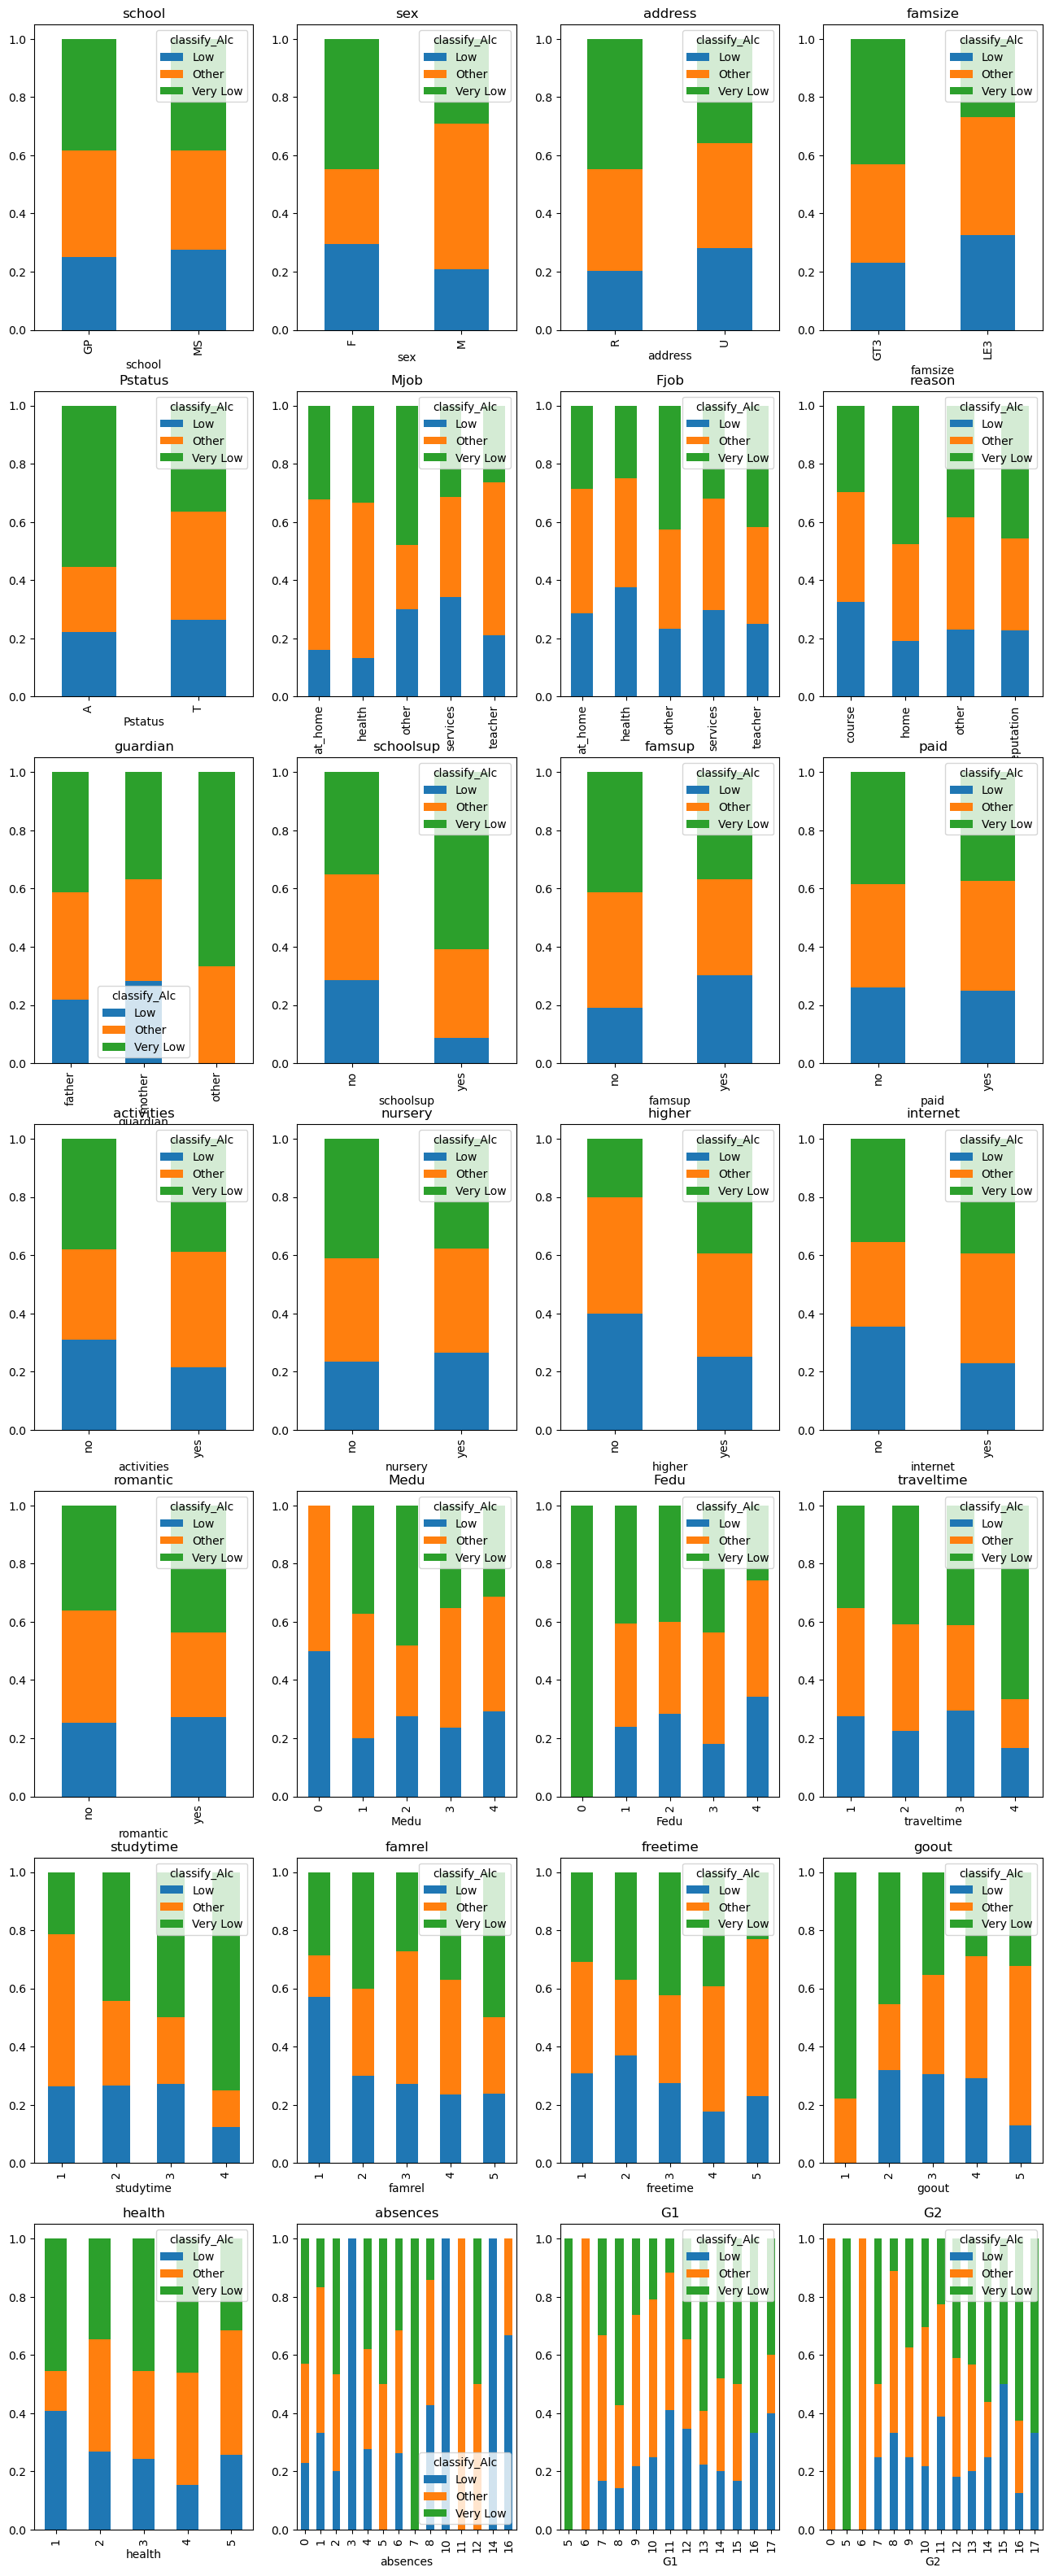

In [22]:
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

<Axes: title={'center': 'address'}, xlabel='G2'>

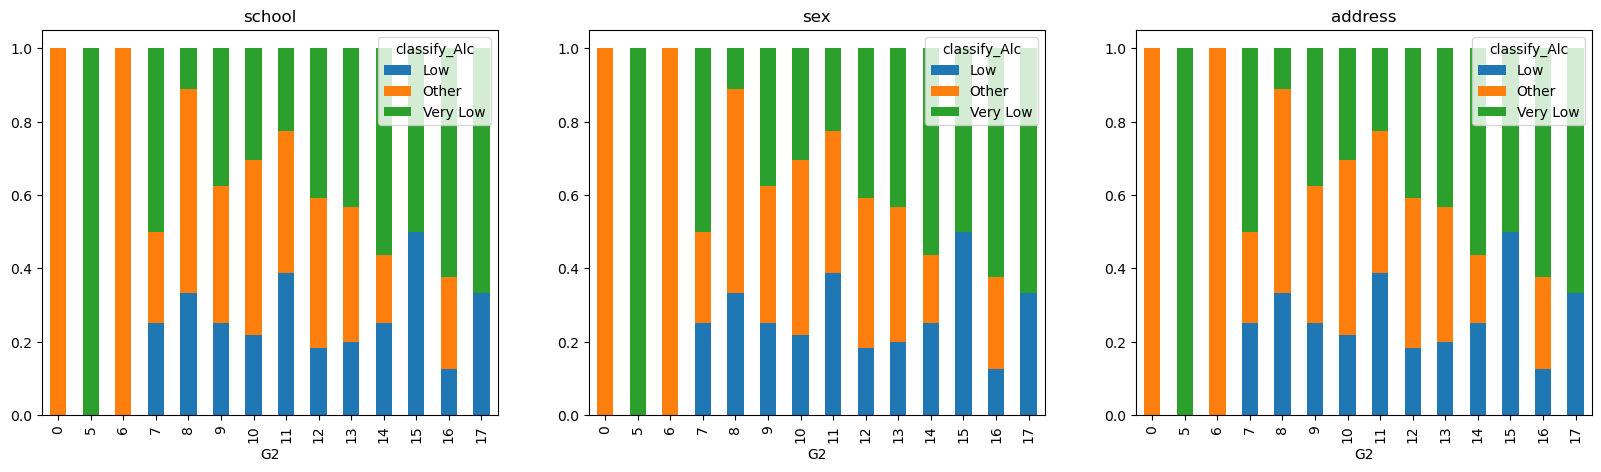

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
cols = ['absences', 'G1', 'G2']

for i in range(3):
    return_group_ratio = set_grouped(df, cols[i])
    setTitle(axes[i], columns[i])
    
return_group_ratio.plot.bar(stacked=True, ax=axes[0])
return_group_ratio.plot.bar(stacked=True, ax=axes[1])
return_group_ratio.plot.bar(stacked=True, ax=axes[2])

<Axes: xlabel='absences'>

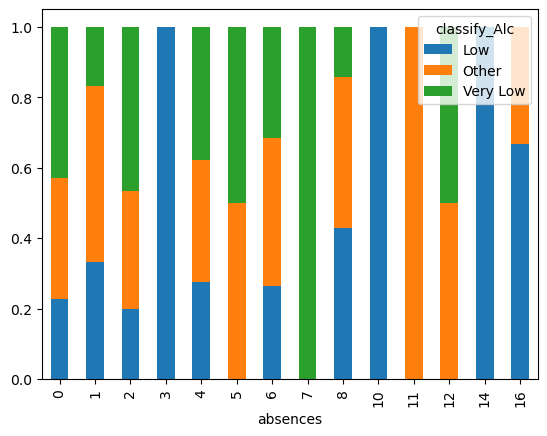

In [17]:
grouped = df.groupby(['absences', 'classify_Alc']).size().unstack()
grouped_ratio = grouped.div(grouped.sum(axis = 1), axis = 0)
grouped_ratio.plot.bar(stacked=True)

<Axes: xlabel='G1'>

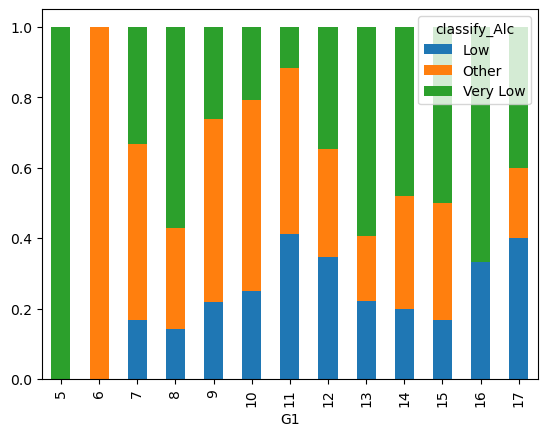

In [18]:
grouped = df.groupby(['G1', 'classify_Alc']).size().unstack()
grouped_ratio = grouped.div(grouped.sum(axis = 1), axis = 0)
grouped_ratio.plot.bar(stacked=True)

<Axes: xlabel='G2'>

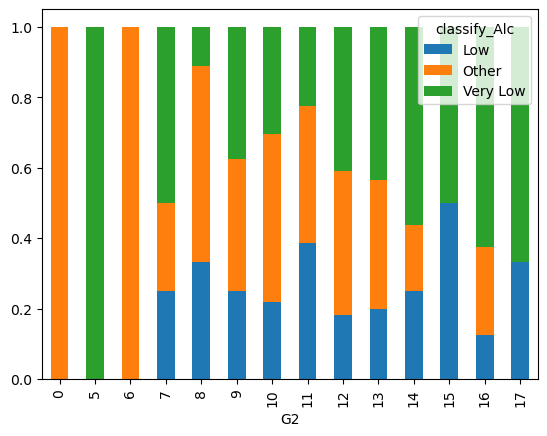

In [19]:
grouped = df.groupby(['G2', 'classify_Alc']).size().unstack()
grouped_ratio = grouped.div(grouped.sum(axis = 1), axis = 0)
grouped_ratio.plot.bar(stacked=True)

<Axes: xlabel='G1', ylabel='count'>

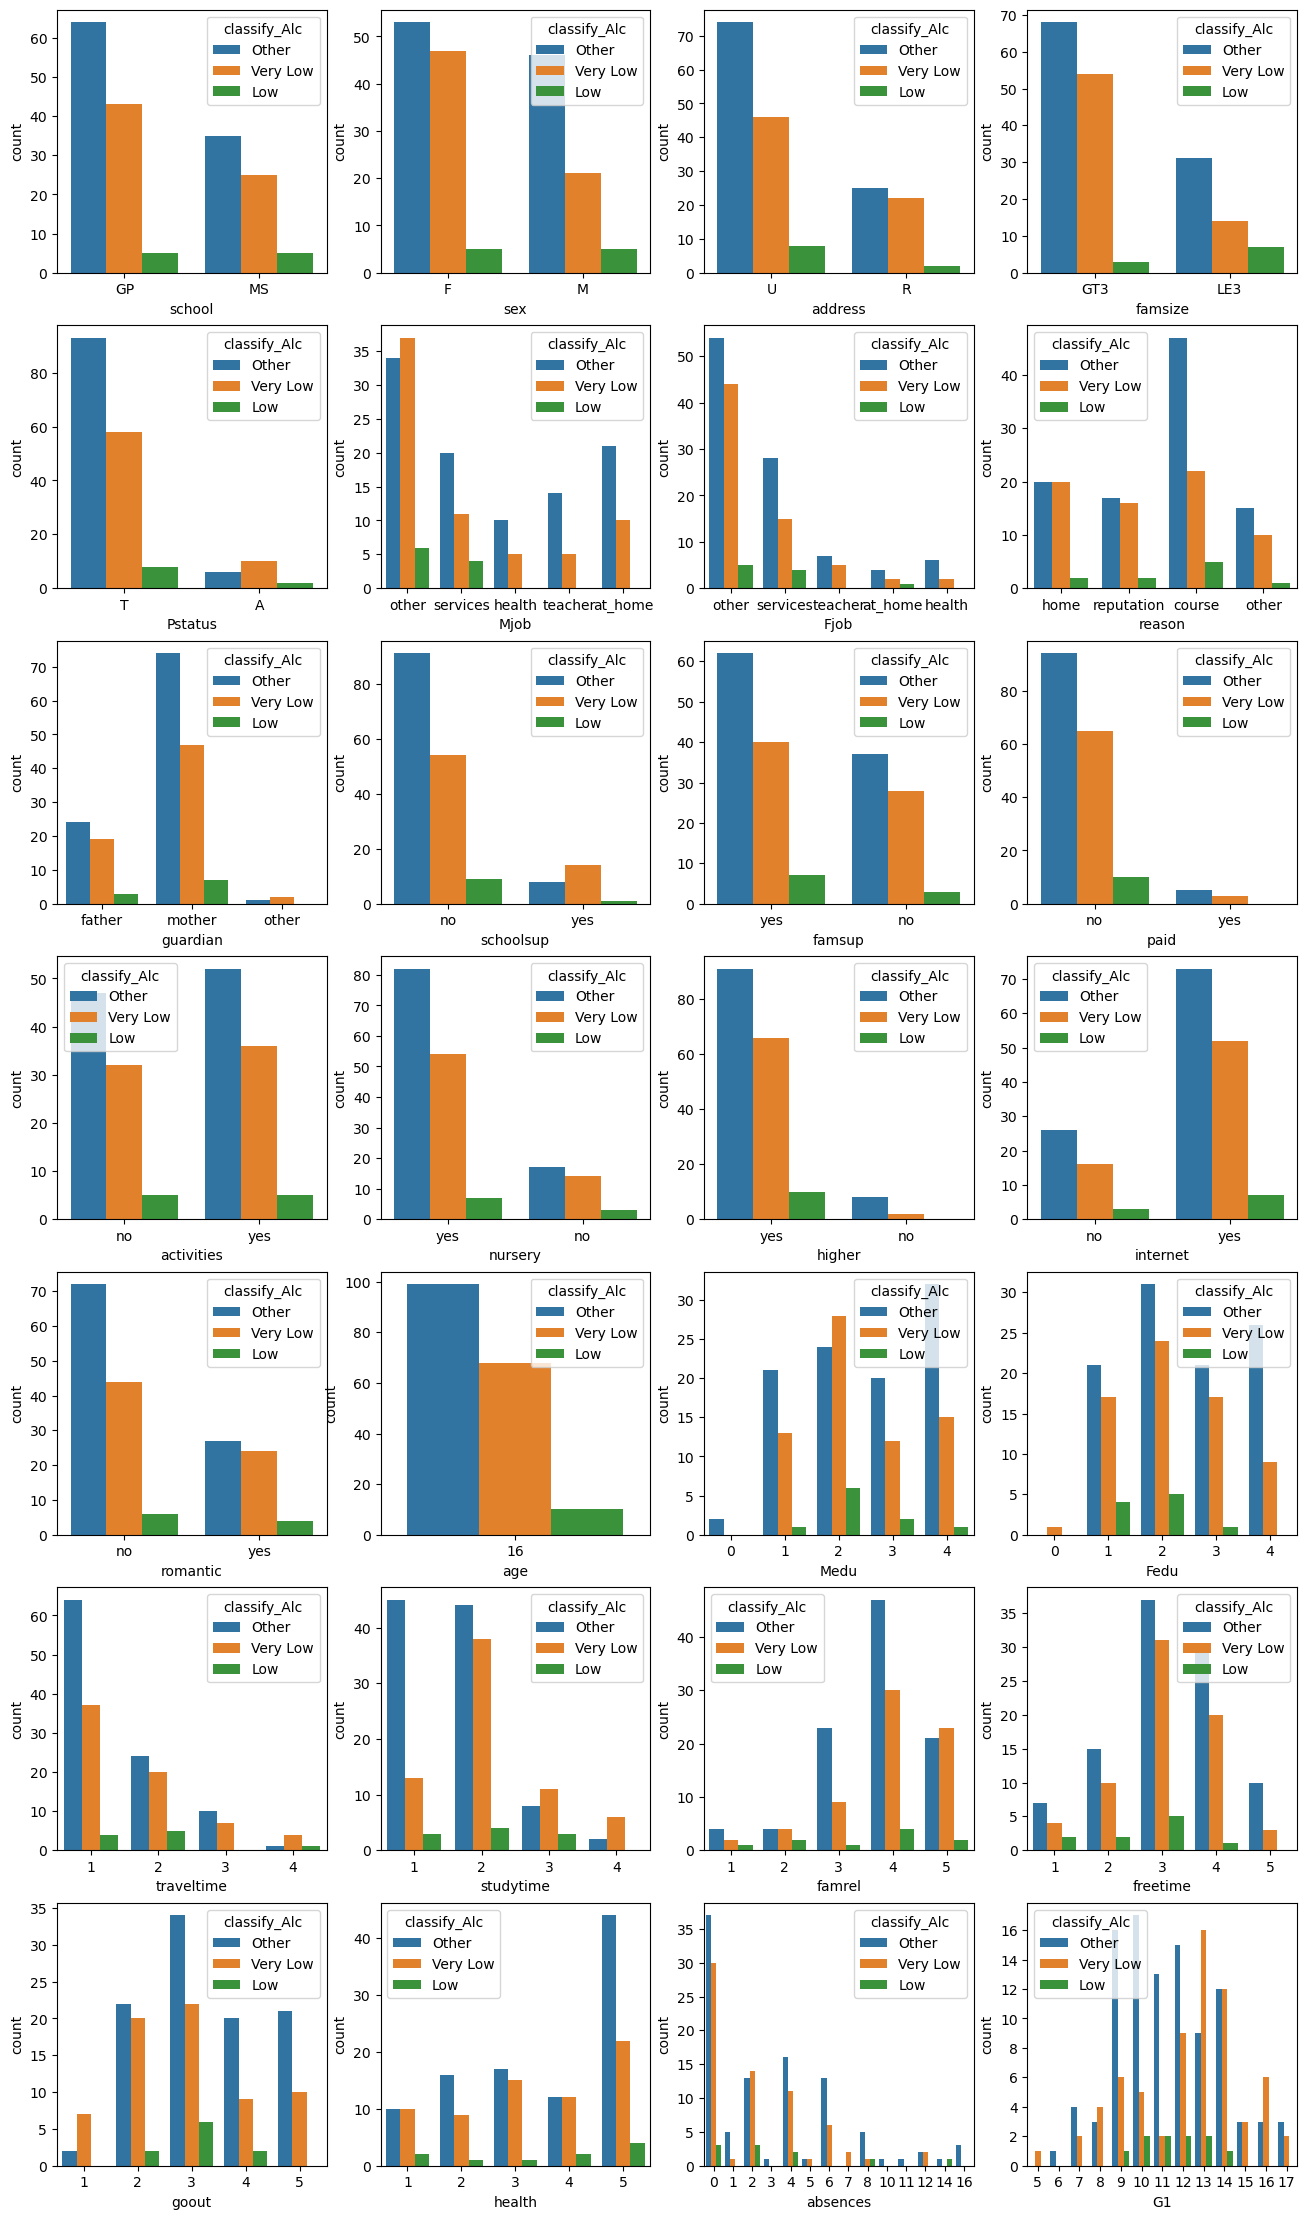

In [51]:
fig, axes = plt.subplots(7, 4, figsize = (16, 28))


sns.countplot(x='school', hue='classify_Alc', data=df, ax = axes[0, 0])
sns.countplot(x='sex', hue='classify_Alc', data=df, ax = axes[0, 1])
sns.countplot(x='address', hue='classify_Alc', data=df, ax = axes[0, 2])
sns.countplot(x='famsize', hue='classify_Alc', data=df, ax = axes[0, 3])
sns.countplot(x='Pstatus', hue='classify_Alc', data=df, ax = axes[1, 0])
sns.countplot(x='Mjob', hue='classify_Alc', data=df, ax = axes[1, 1])
sns.countplot(x='Fjob', hue='classify_Alc', data=df, ax = axes[1, 2])
sns.countplot(x='reason', hue='classify_Alc', data=df, ax = axes[1, 3])
sns.countplot(x='guardian', hue='classify_Alc', data=df, ax = axes[2, 0])
sns.countplot(x='schoolsup', hue='classify_Alc', data=df, ax = axes[2, 1])
sns.countplot(x='famsup', hue='classify_Alc', data=df, ax = axes[2, 2])
sns.countplot(x='paid', hue='classify_Alc', data=df, ax = axes[2, 3])
sns.countplot(x='activities', hue='classify_Alc', data=df, ax = axes[3, 0])
sns.countplot(x='nursery', hue='classify_Alc', data=df, ax = axes[3, 1])
sns.countplot(x='higher', hue='classify_Alc', data=df, ax = axes[3, 2])
sns.countplot(x='internet', hue='classify_Alc', data=df, ax = axes[3, 3])
sns.countplot(x='romantic', hue='classify_Alc', data=df, ax = axes[4, 0])
sns.countplot(x='age', hue='classify_Alc', data=df, ax = axes[4, 1])
sns.countplot(x='Medu', hue='classify_Alc', data=df, ax = axes[4, 2])
sns.countplot(x='Fedu', hue='classify_Alc', data=df, ax = axes[4, 3])
sns.countplot(x='traveltime', hue='classify_Alc', data=df, ax = axes[5, 0])
sns.countplot(x='studytime', hue='classify_Alc', data=df, ax = axes[5, 1])
sns.countplot(x='famrel', hue='classify_Alc', data=df, ax = axes[5, 2])
sns.countplot(x='freetime', hue='classify_Alc', data=df, ax = axes[5, 3])
sns.countplot(x='goout', hue='classify_Alc', data=df, ax = axes[6, 0])
sns.countplot(x='health', hue='classify_Alc', data=df, ax = axes[6, 1])
sns.countplot(x='absences', hue='classify_Alc', data=df, ax = axes[6, 2])
sns.countplot(x='G1', hue='classify_Alc', data=df, ax = axes[6, 3])


In [52]:
df_GP_M = df[(df['school'] == 'GP') & (df['sex'] == 'M')]    # 53개
df_GP_F = df[(df['school'] == 'GP') & (df['sex'] == 'F')]    # 59개
df_MS_M = df[(df['school'] == 'MS') & (df['sex'] == 'M')]    # 19개
df_MS_F = df[(df['school'] == 'MS') & (df['sex'] == 'F')]    # 46개

In [53]:
df_MS_F

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,classify_Alc
423,MS,F,U,GT3,T,at_home,other,other,father,no,...,4,3,3,1,3,5,11,10,11,Other
424,MS,F,R,GT3,T,other,other,course,mother,no,...,4,4,4,1,1,5,0,12,12,Very Low
427,MS,F,R,GT3,T,at_home,services,course,mother,no,...,4,5,2,1,2,5,0,16,17,Other
434,MS,F,U,LE3,A,at_home,other,reputation,mother,no,...,1,2,1,1,1,1,4,10,9,Very Low
437,MS,F,R,GT3,T,other,other,other,mother,no,...,3,2,3,1,2,2,0,12,11,Other
448,MS,F,R,GT3,T,teacher,teacher,course,mother,no,...,4,2,2,1,1,4,6,16,16,Very Low
450,MS,F,R,GT3,T,other,services,course,mother,no,...,4,5,4,1,2,1,2,15,15,Other
452,MS,F,R,GT3,T,other,other,course,mother,no,...,4,4,5,1,1,4,4,9,10,Very Low
453,MS,F,U,GT3,T,other,services,course,mother,no,...,1,3,2,1,2,4,0,10,8,Other
454,MS,F,U,GT3,T,other,services,course,mother,no,...,1,3,2,1,2,4,3,9,8,Other


In [54]:
df_M = df[df['sex'] == 'M']
df_F = df[df['sex'] == 'F']
df_GP = df[df['school'] == 'GP']
df_MS = df[df['school'] == 'MS']

In [55]:
### 남, 여 별로 시각화 진행

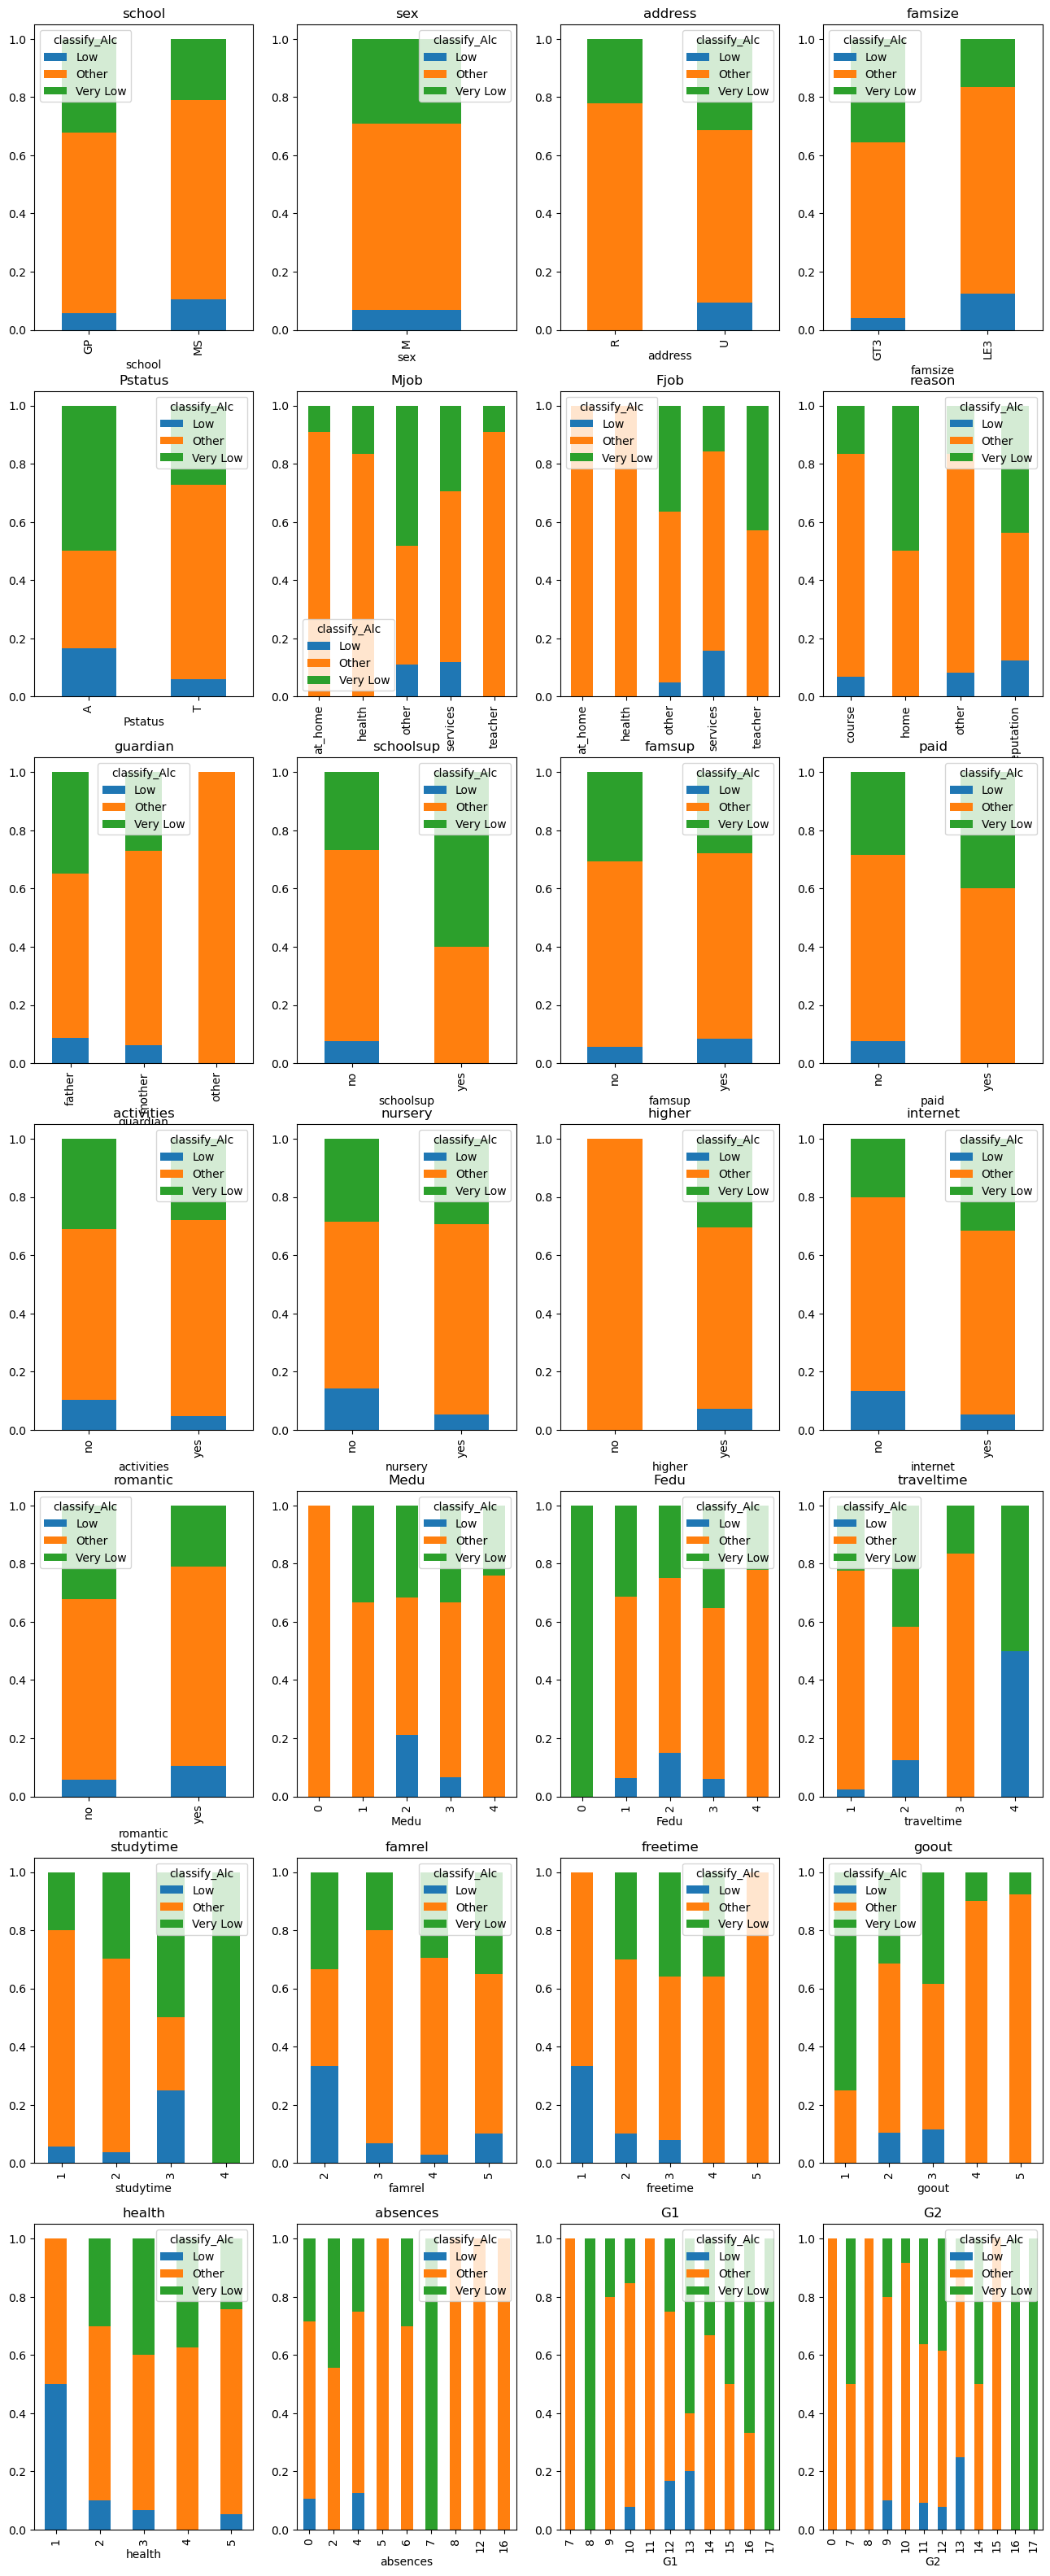

In [56]:
# 남자 데이터
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_M, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

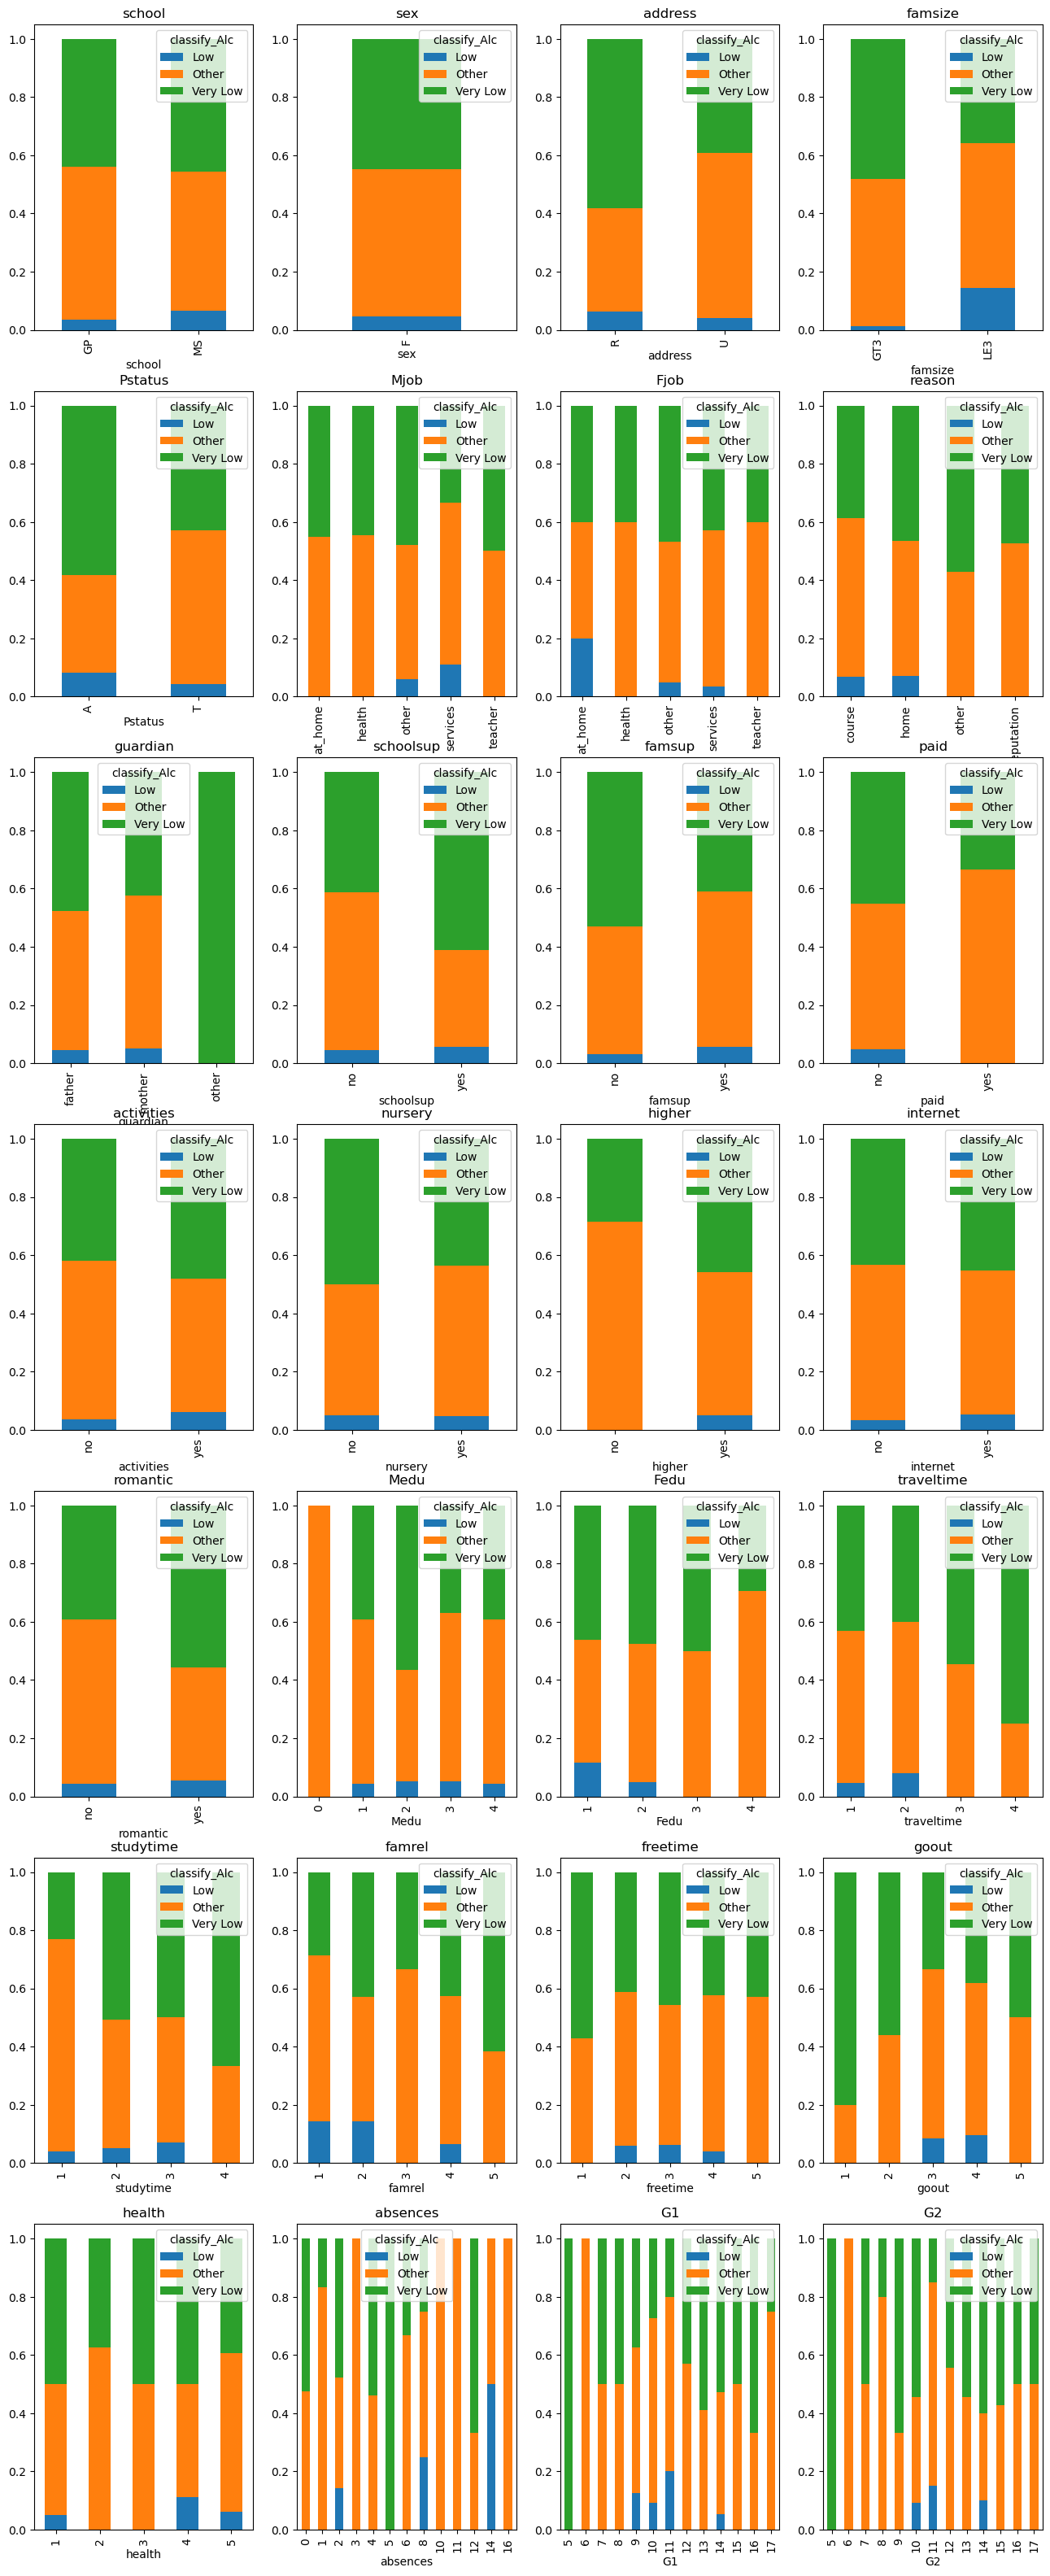

In [57]:
# 여자 데이터
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_F, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

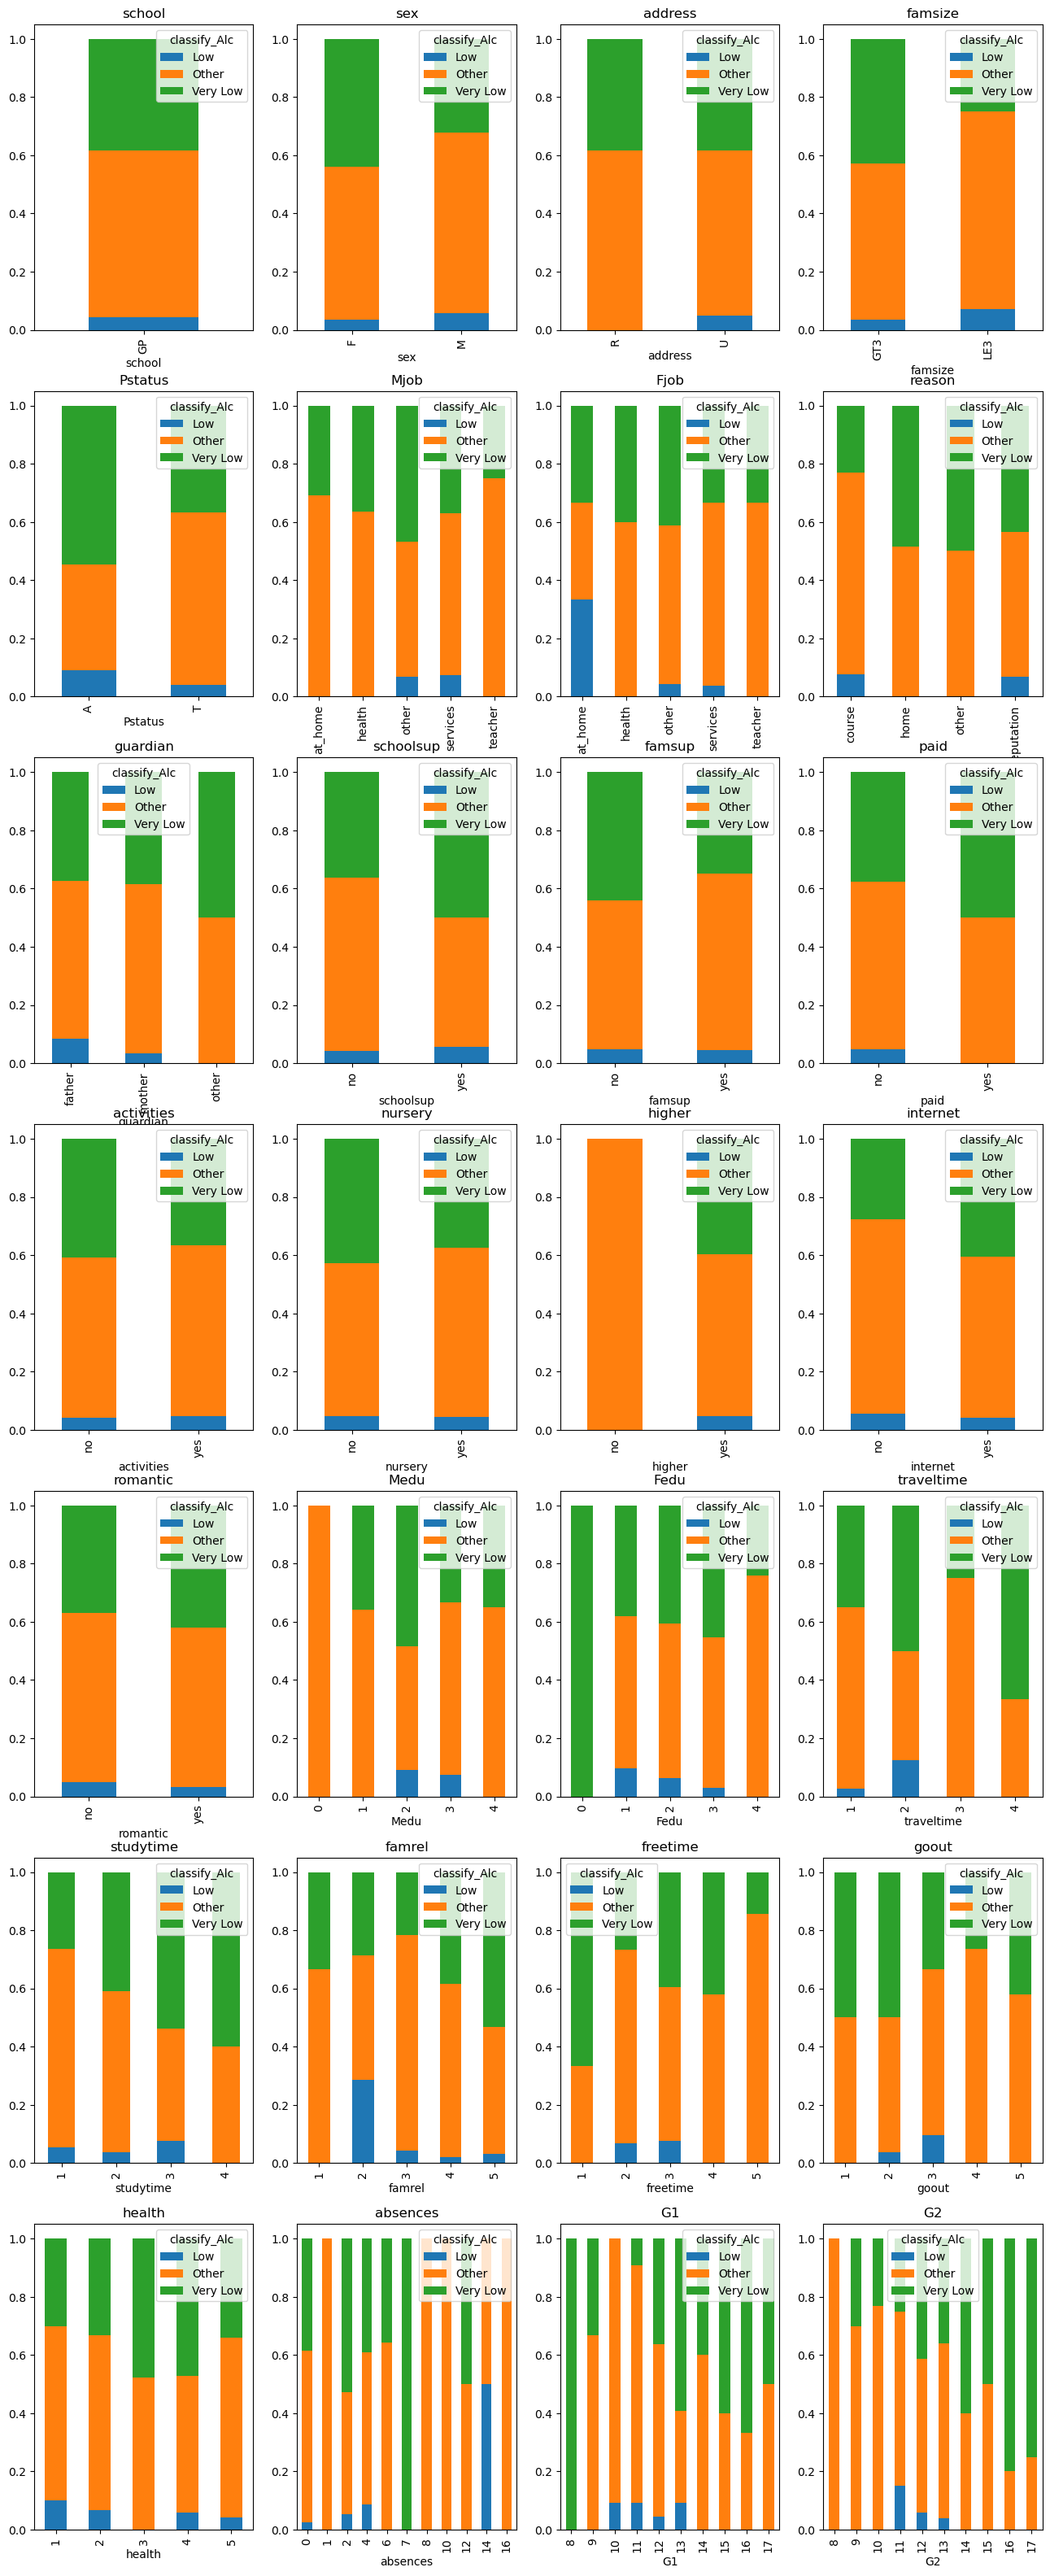

In [58]:
# GP 데이터
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_GP, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

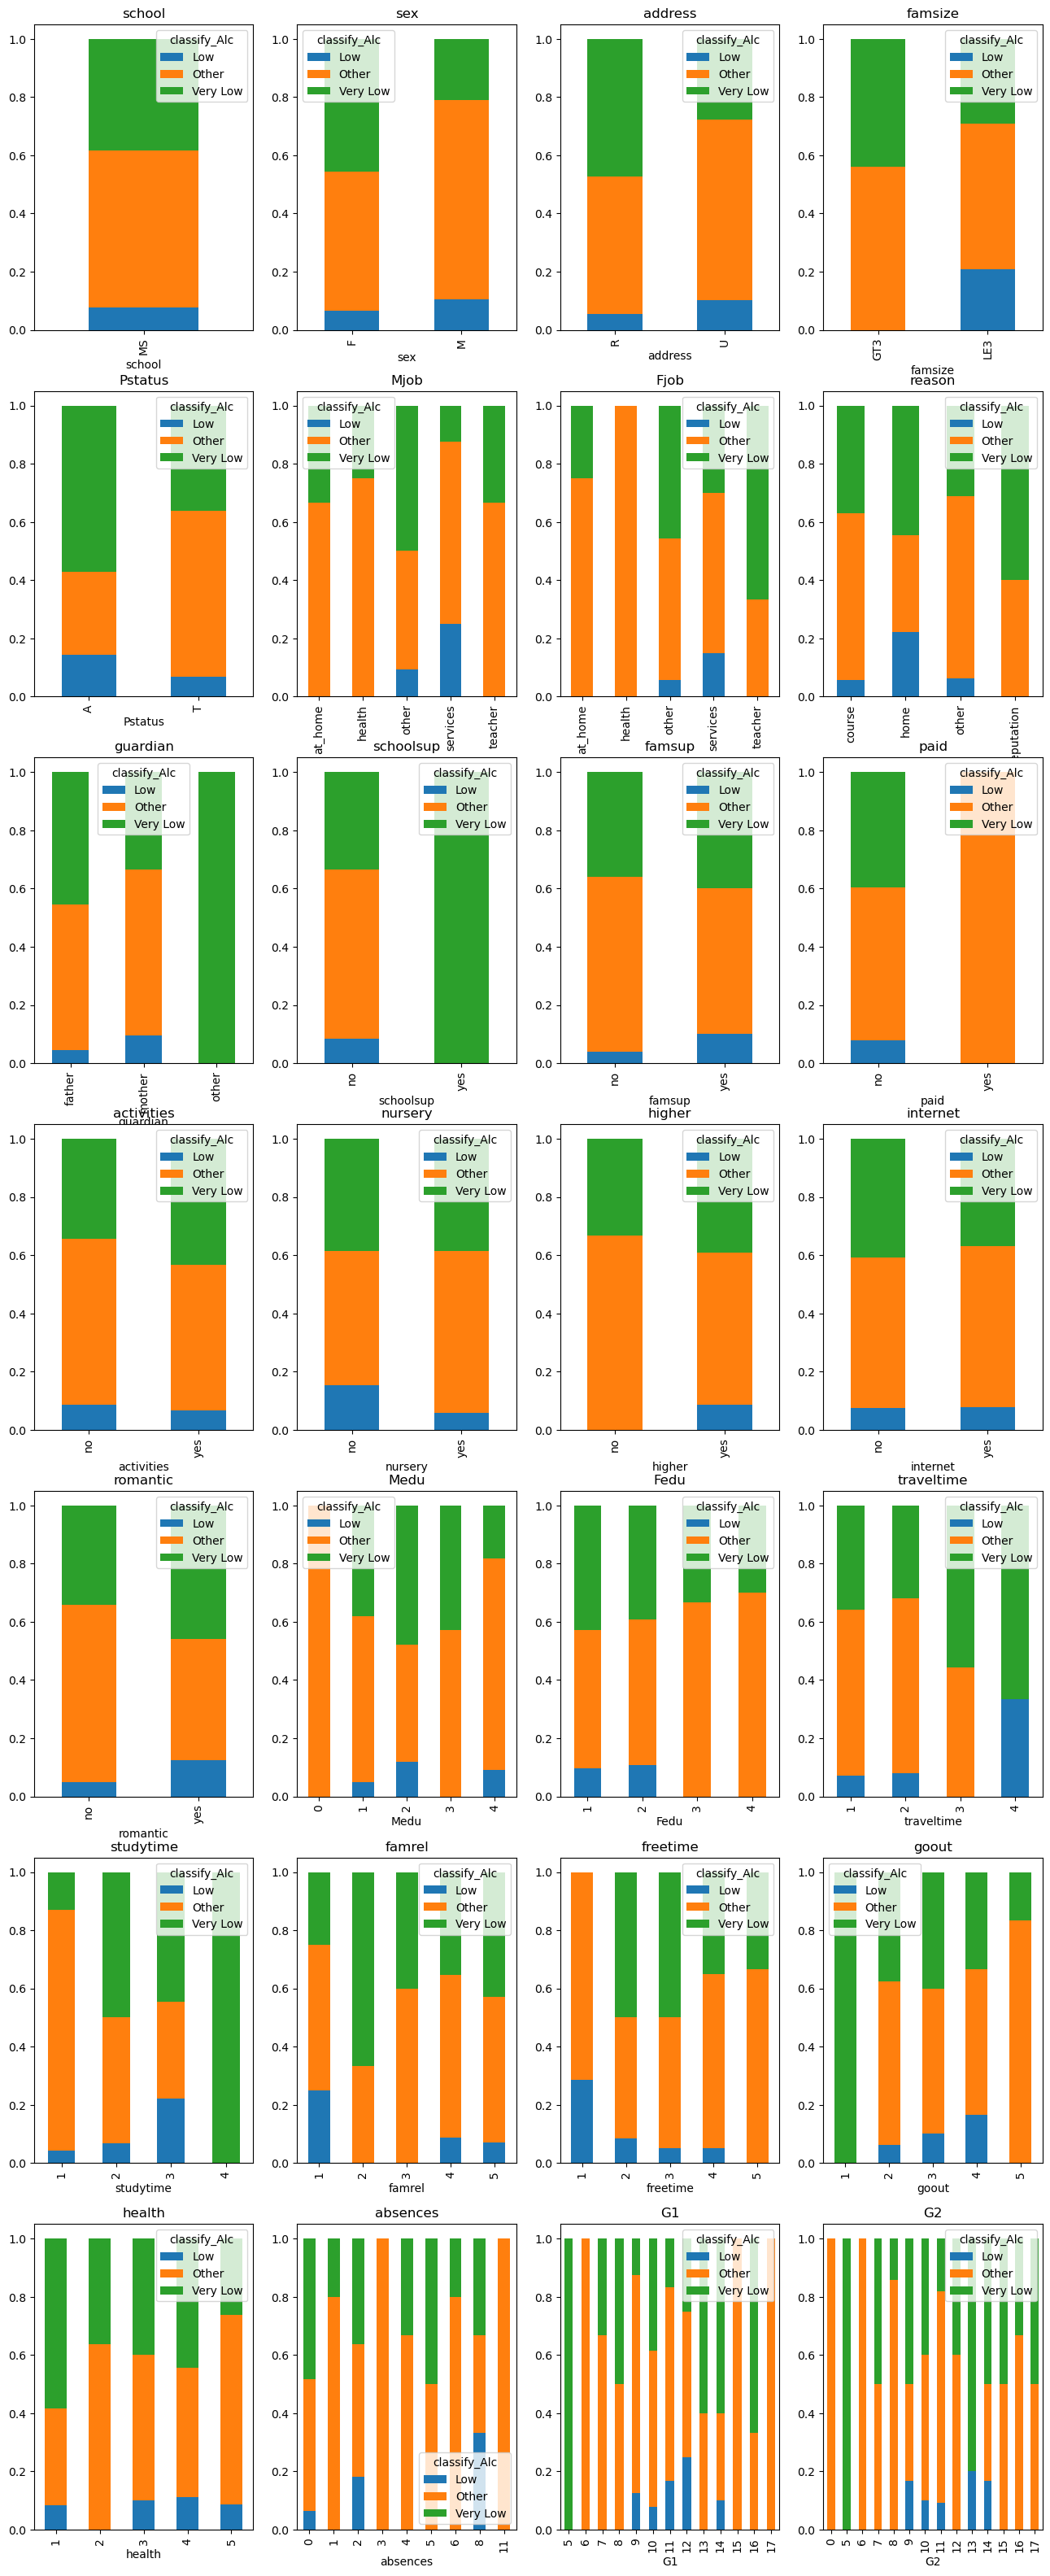

In [59]:
# MS 데이터
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_MS, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

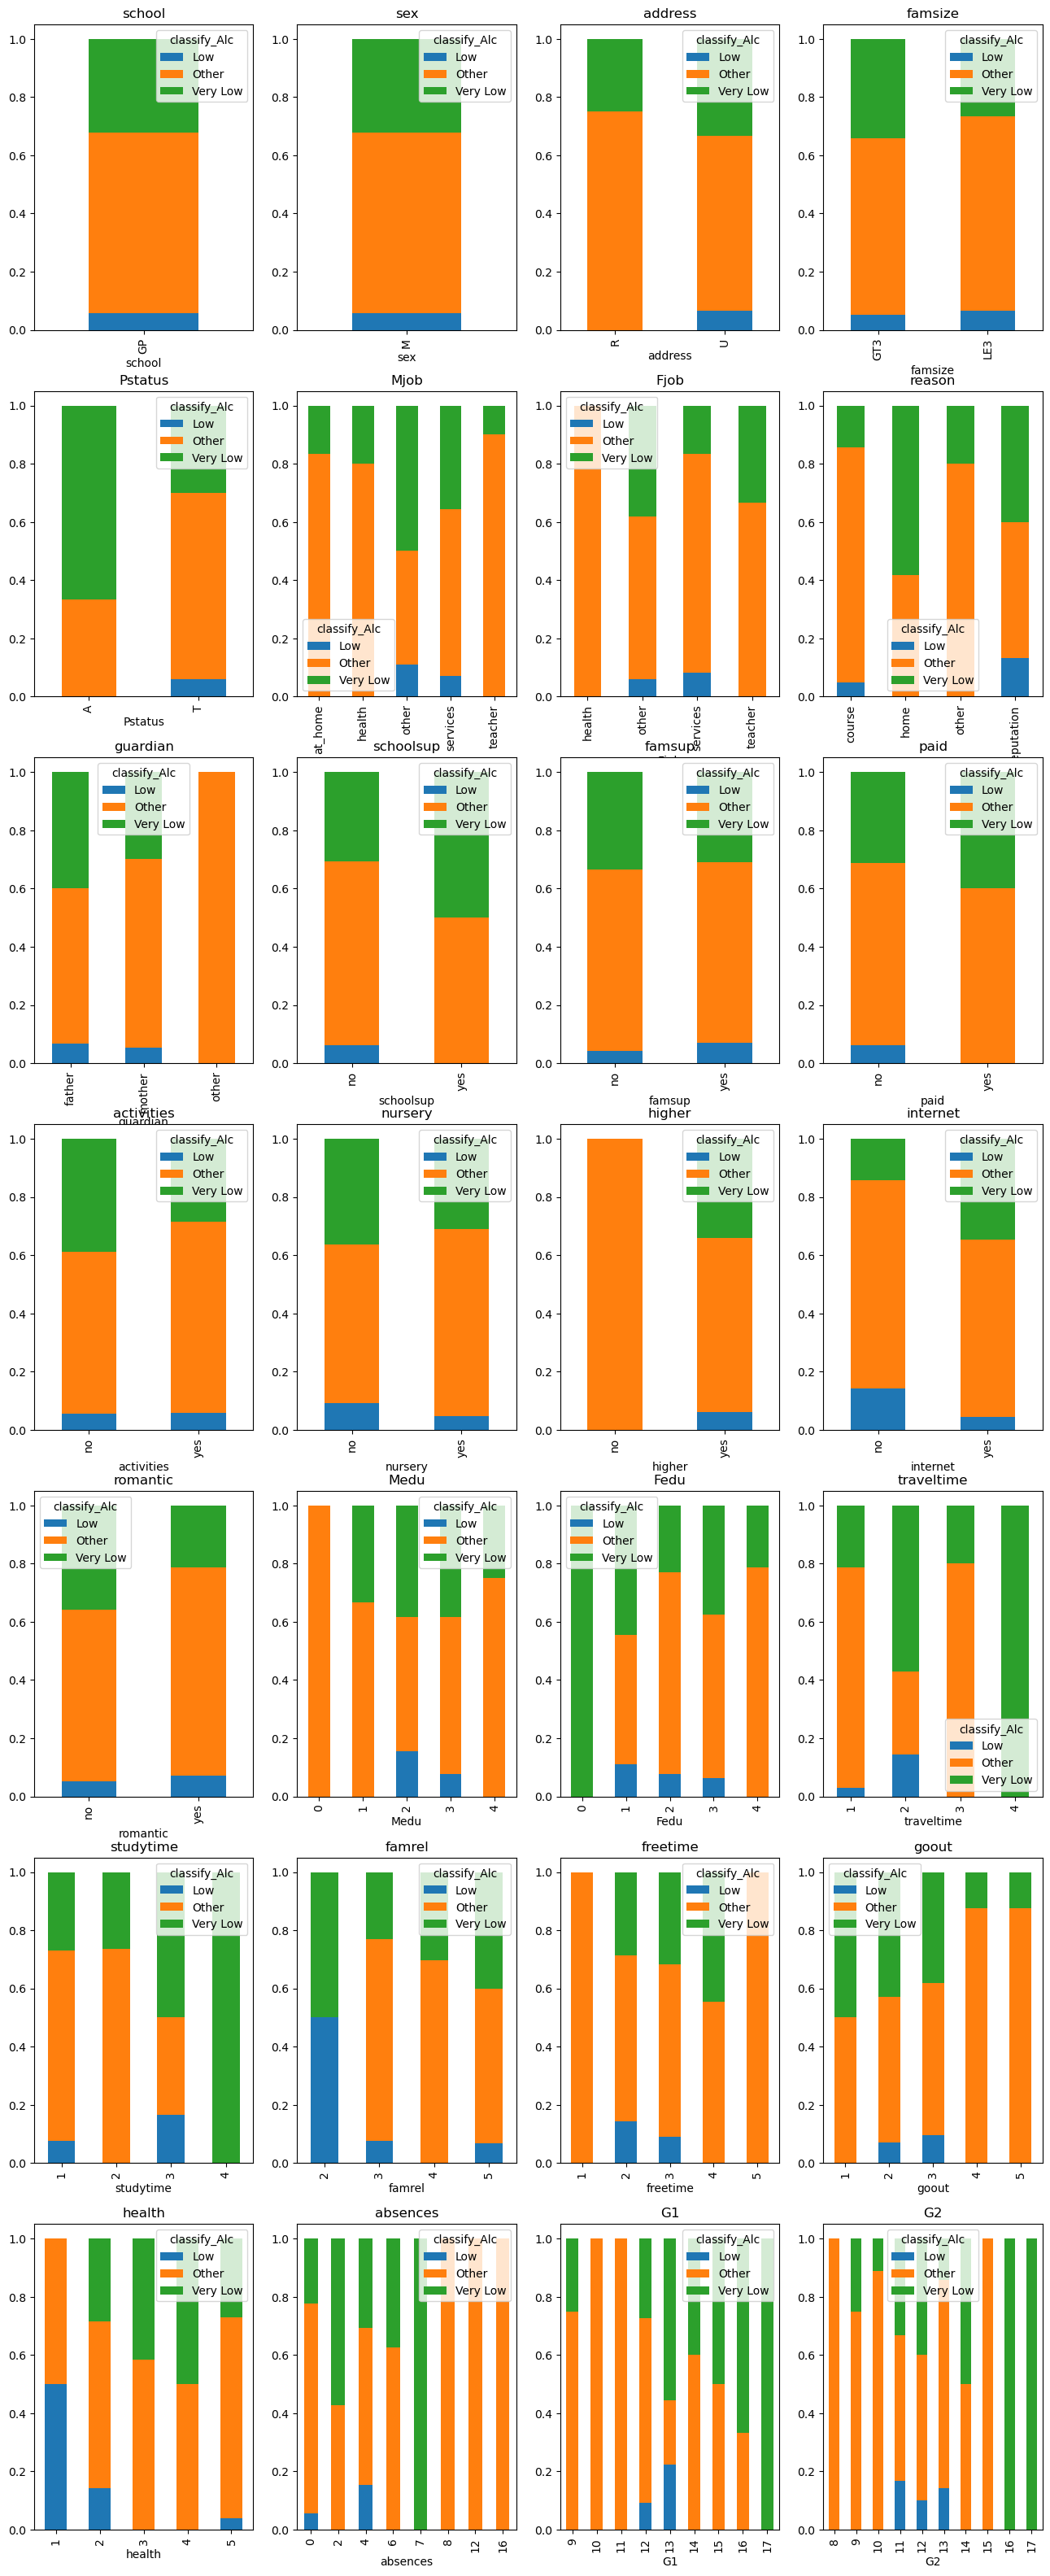

In [60]:
# GP, M 데이터
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_GP_M, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

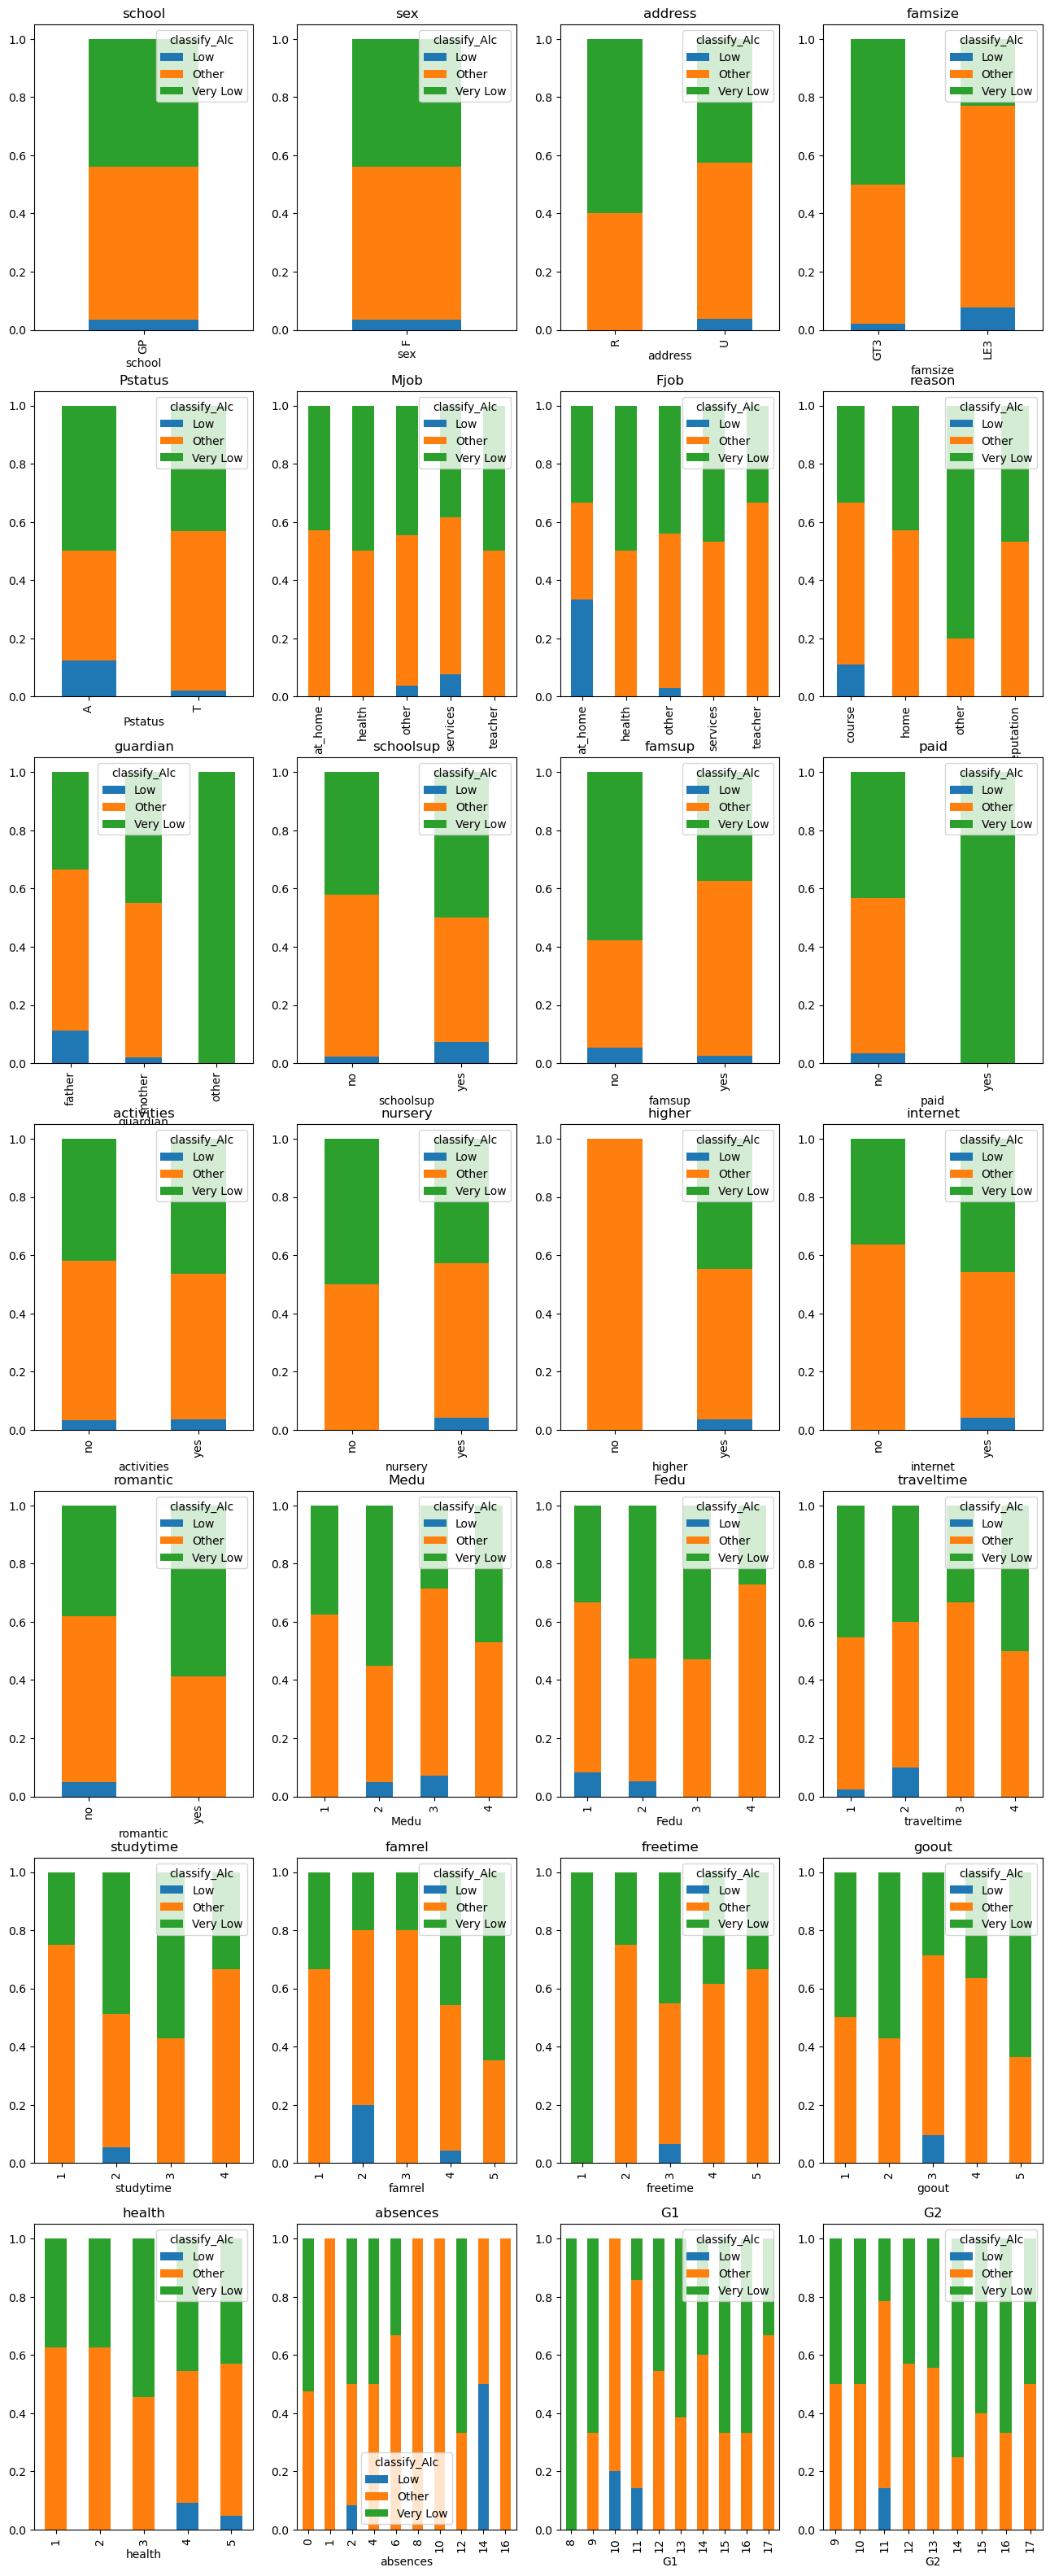

In [61]:
# GP, F 데이터
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_GP_F, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

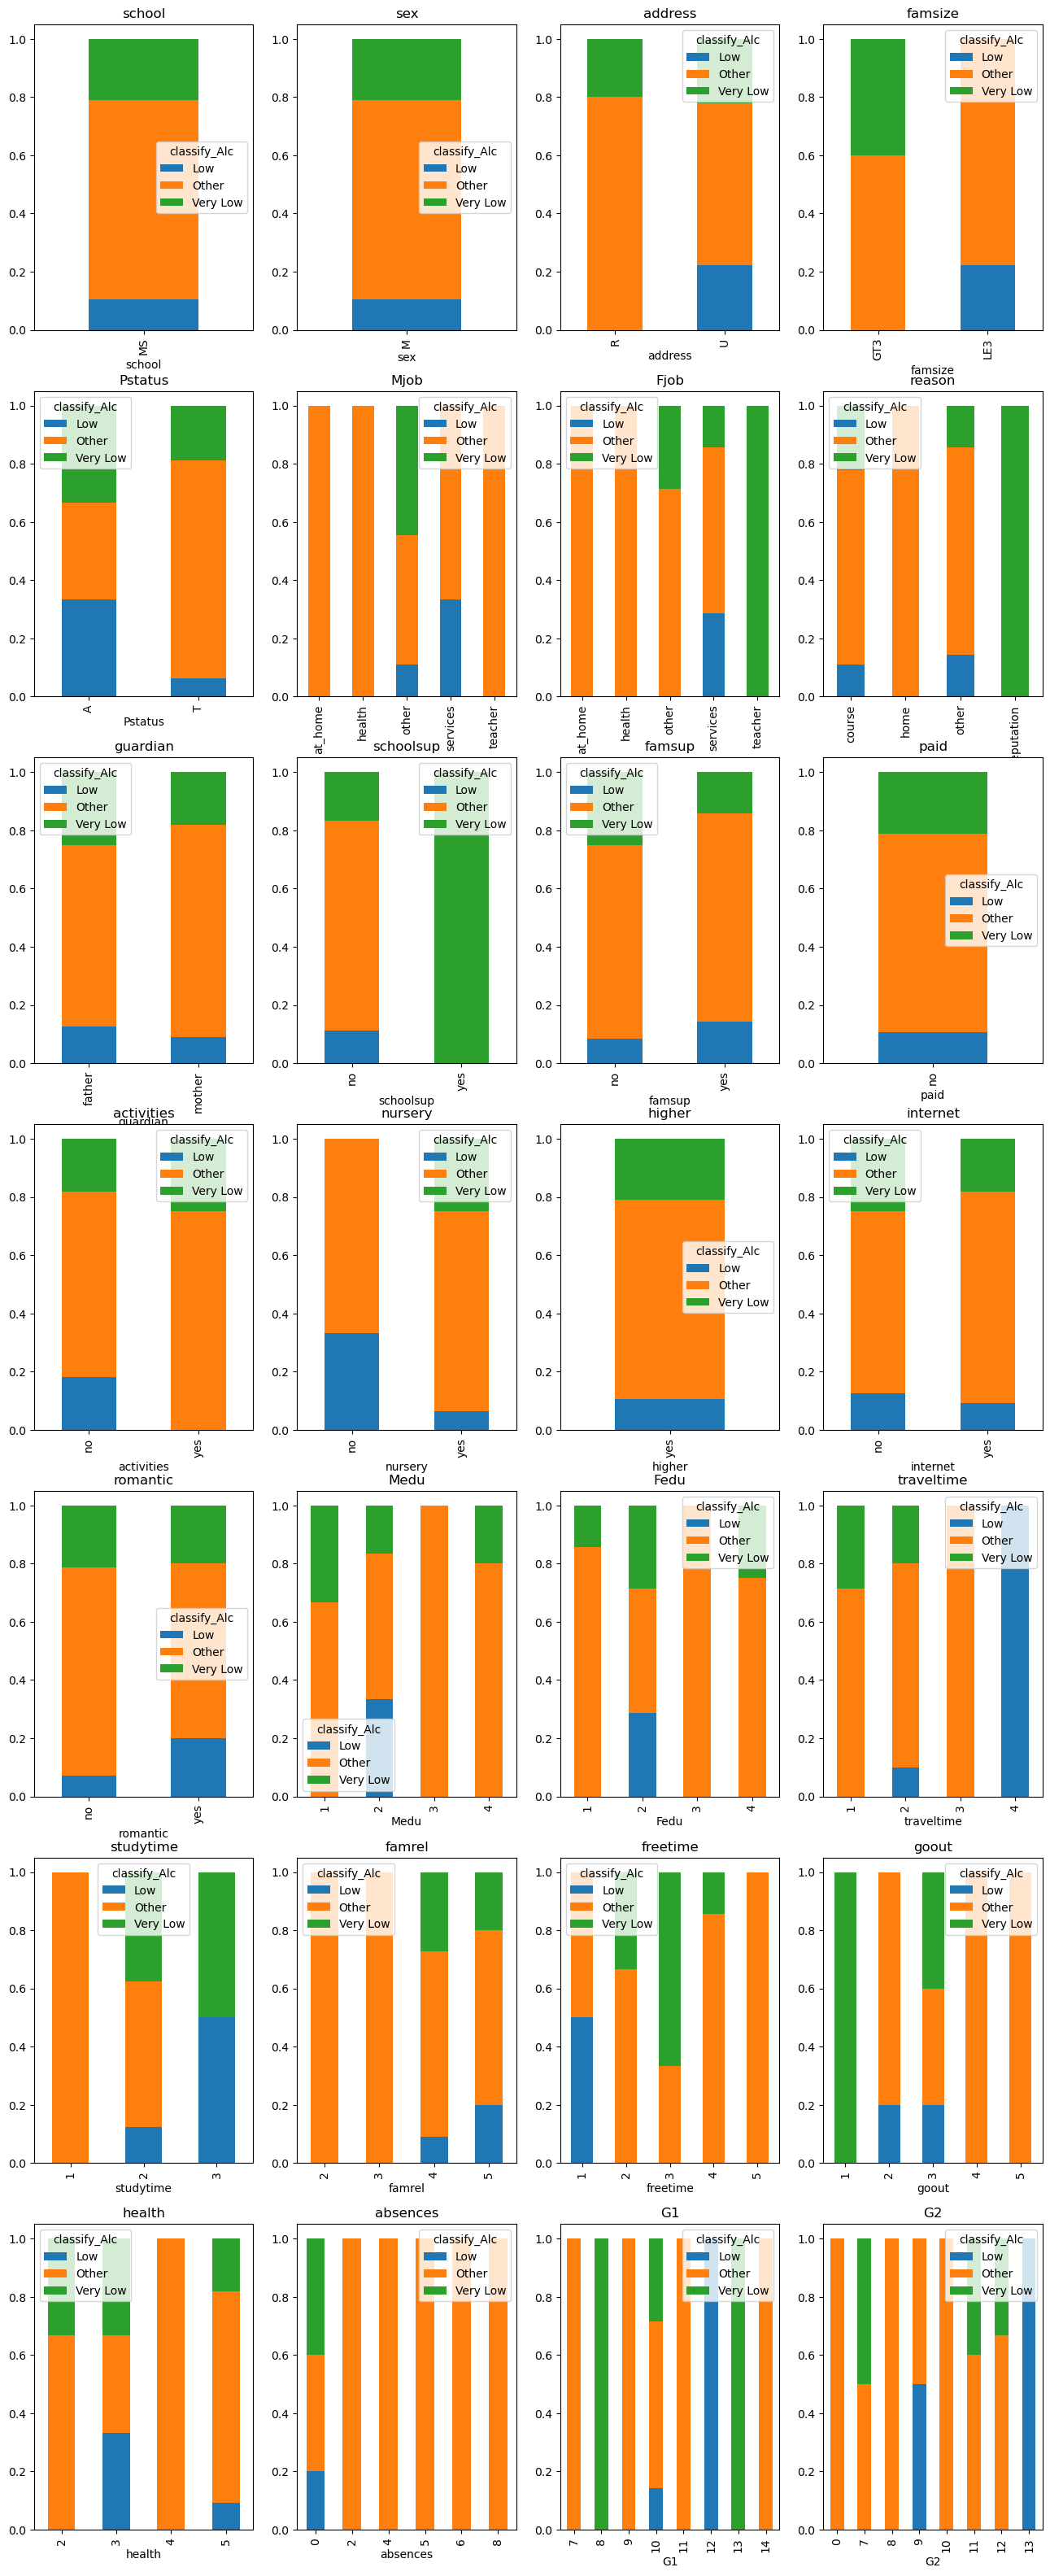

In [62]:
# MS, M 데이터
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_MS_M, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

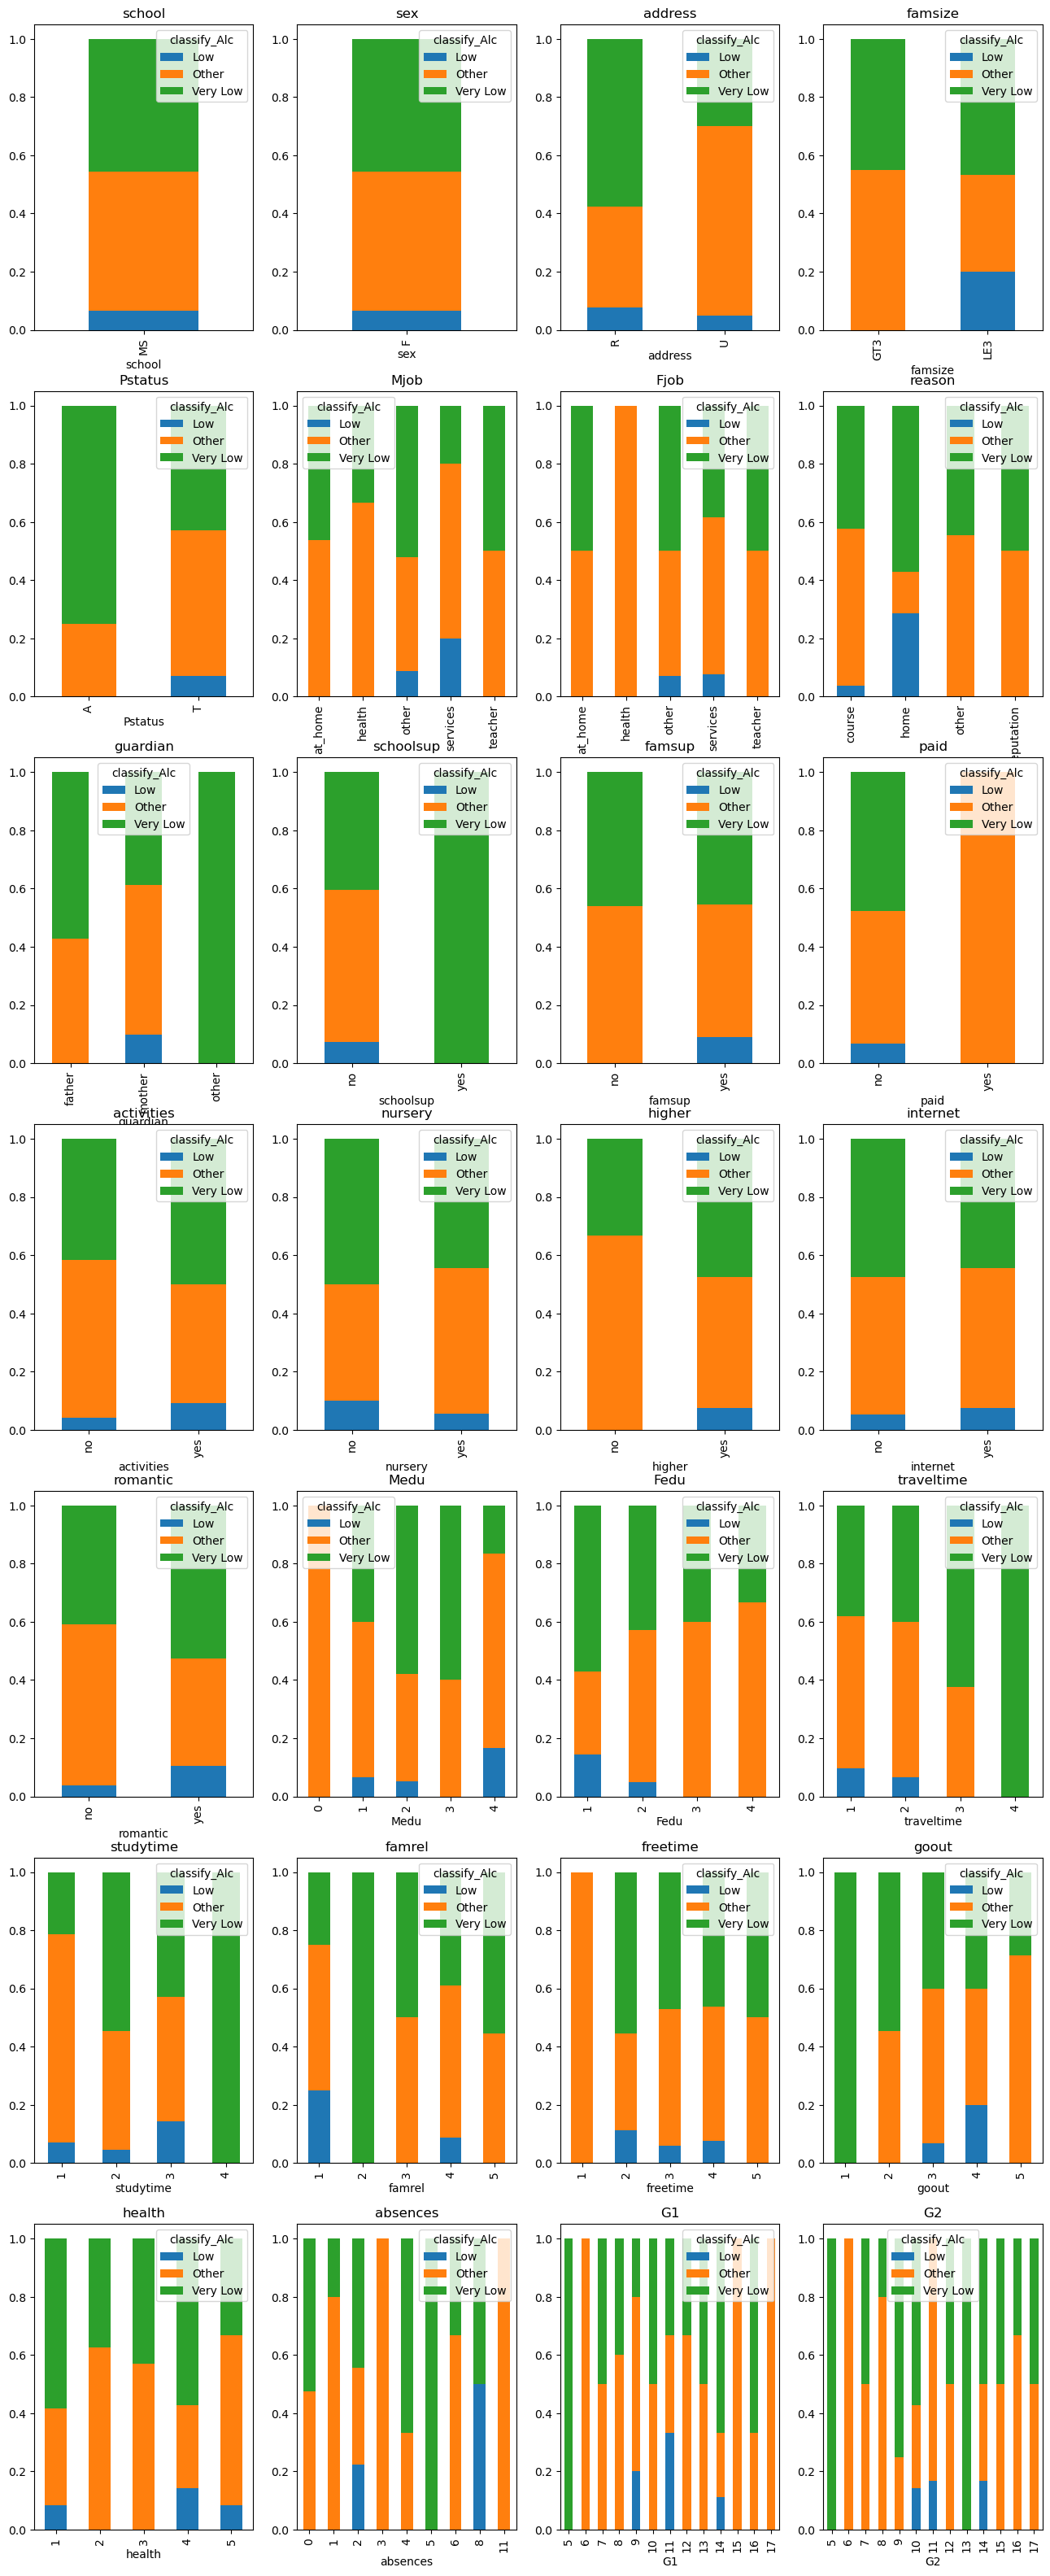

In [63]:
# MS, F 데이터
fig, axes = plt.subplots(7, 4, figsize = (16, 40))

for i in range(7):
    for j in range(4):
        return_group_ratio = set_grouped(df_MS_F, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)